In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from SHIPS_ML_model_funcs import calc_AUPD, calculate_PD_curves
from SHIPS_plotting import plot_roc_curve, plot_precision_recall_vs_threshold,add_model_results,make_performance_diagram_background
from SHIPS_plotting import plot_CSI_vs_bias, plot_PD_curves_compare_models 
import matplotlib.colors

##### File info for RF results

In [2]:
RF_score = 'gini'
yr_start = 2005
yr_end = 2019
mask = 'SIMPLE_MASK'
stand_str = 'STANDARDIZED'
RI_thresh = 30
weights = 'default'
N_samples_RF = 15
scoring = 'f1_weighted'
RF_dir = '~/SHIPS/SHIPS_clean/Model_Results/RF/'
RF_ext = '_{RF_score}_SHIPS_SIMPLE_RI_vs_no_RI_{yr_start}-{yr_end}_{mask}_{stand_str}_RI_thresh_{RI_thresh}weights_'\
'{weights}_wts_{N_samples_RF}_samples_{scoring}.csv'.format(RF_score=RF_score,yr_start=yr_start,yr_end=yr_end,mask=mask,
            stand_str=stand_str,RI_thresh=RI_thresh,weights=weights,N_samples_RF=N_samples_RF,scoring=scoring)


##### File info for LR results

lbfgs_SHIPS_SIMPLE_RI_vs_no_RI_2005-2020_SIMPLE_MASK_STANDARDIZED_RI_thresh_40weights_default_wts_15_samples.csv

In [3]:
LR_models = ['lbfgs','saga']
N_samples_LR = 15
LR_dir = '~/SHIPS/SHIPS_clean/Model_Results/LOGISTIC/'
LR_ext1 = '_{model}_SHIPS_SIMPLE_RI_vs_no_RI_{yr_start}-{yr_end}_{mask}_{stand_str}_RI_thresh_{RI_thresh}weights_'\
'{weights}_wts_{N_samples_RF}_samples_{scoring}.csv'.format(model=LR_models[0],yr_start=yr_start,yr_end=yr_end,mask=mask,
                                  stand_str=stand_str,RI_thresh=RI_thresh,weights=weights,N_samples_RF=N_samples_LR,scoring=scoring)
LR_ext2 = '_{model}_SHIPS_SIMPLE_RI_vs_no_RI_{yr_start}-{yr_end}_{mask}_{stand_str}_RI_thresh_{RI_thresh}weights_'\
'{weights}_wts_{N_samples_RF}_samples_{scoring}.csv'.format(model=LR_models[1],yr_start=yr_start,yr_end=yr_end,mask=mask,
                                  stand_str=stand_str,RI_thresh=RI_thresh,weights=weights,N_samples_RF=N_samples_LR,scoring=scoring)

##### Precision vs recall for LR vs RF

In [4]:
p_vs_r_RF = pd.read_csv(RF_dir+'Prec_vs_recall'+RF_ext)
p_vs_r_LR1 = pd.read_csv(LR_dir+'Prec_vs_recall'+LR_ext1)
p_vs_r_LR2 = pd.read_csv(LR_dir+'Prec_vs_recall'+LR_ext2)
#
prec_vs_rec = pd.concat([p_vs_r_RF,p_vs_r_LR1,p_vs_r_LR2])

In [5]:
prec_vs_rec['BASIN'] = prec_vs_rec['BASIN'].replace('SOUTH_PACIFIC','SOUTHERN_HEM',regex=True)

In [6]:
#prec_vs_rec['BASIN'].unique()

##### Predicted Y-vals

In [7]:
y_vals_RF = pd.read_csv(RF_dir+'PREDICTED_Y_vals'+RF_ext)
y_vals_LR1 = pd.read_csv(LR_dir+'PREDICTED_Y_vals'+LR_ext1)
y_vals_LR2 = pd.read_csv(LR_dir+'PREDICTED_Y_vals'+LR_ext2)
#
y_vals = pd.concat([y_vals_RF,y_vals_LR1,y_vals_LR2])
y_vals['BASIN'] = y_vals['BASIN'].replace('SOUTH_PACIFIC','SOUTHERN_HEM',regex=True)

##### Also need the confusion matrix results

In [8]:
cm_RF = pd.read_csv(RF_dir+'Conf_Matrix'+RF_ext)
#cm_RF = cm_RF.rename(columns={'Model':'Model Name'})
cm_LR1 = pd.read_csv(LR_dir+'Conf_Matrix'+LR_ext1)
cm_LR2 = pd.read_csv(LR_dir+'Conf_Matrix'+LR_ext2)
#
cm_res = pd.concat([cm_RF,cm_LR1,cm_LR2])
cm_res['BASIN'] = cm_res['BASIN'].replace('SOUTH_PACIFIC','SOUTHERN_HEM',regex=True)

#### ROC results

In [9]:
roc_RF = pd.read_csv(RF_dir+'ROC_AUC_vals'+RF_ext)
#cm_RF = cm_RF.rename(columns={'Model':'Model Name'})
roc_LR1 = pd.read_csv(LR_dir+'ROC_AUC_vals'+LR_ext1)
roc_LR2 = pd.read_csv(LR_dir+'ROC_AUC_vals'+LR_ext2)
#
roc_res = pd.concat([roc_RF,roc_LR1,roc_LR2])
roc_res['BASIN'] = roc_res['BASIN'].replace('SOUTH_PACIFIC','SOUTHERN_HEM',regex=True)

In [10]:
basin_ALL = cm_res['BASIN'].unique().tolist()
fig_format = 'pdf'

#### Performance Diagram

/local/home/mmcgraw/SHIPS/SHIPS_clean/SHIPS_plotting.py:214: UserWarning: The following kwargs were not used by contour: 'axes'
  plt.contourf(success_ratio_matrix, pod_matrix, csi_matrix,
/local/home/mmcgraw/SHIPS/SHIPS_clean/SHIPS_plotting.py:229: UserWarning: The following kwargs were not used by contour: 'axes'
  bias_contour_object = plt.contour(


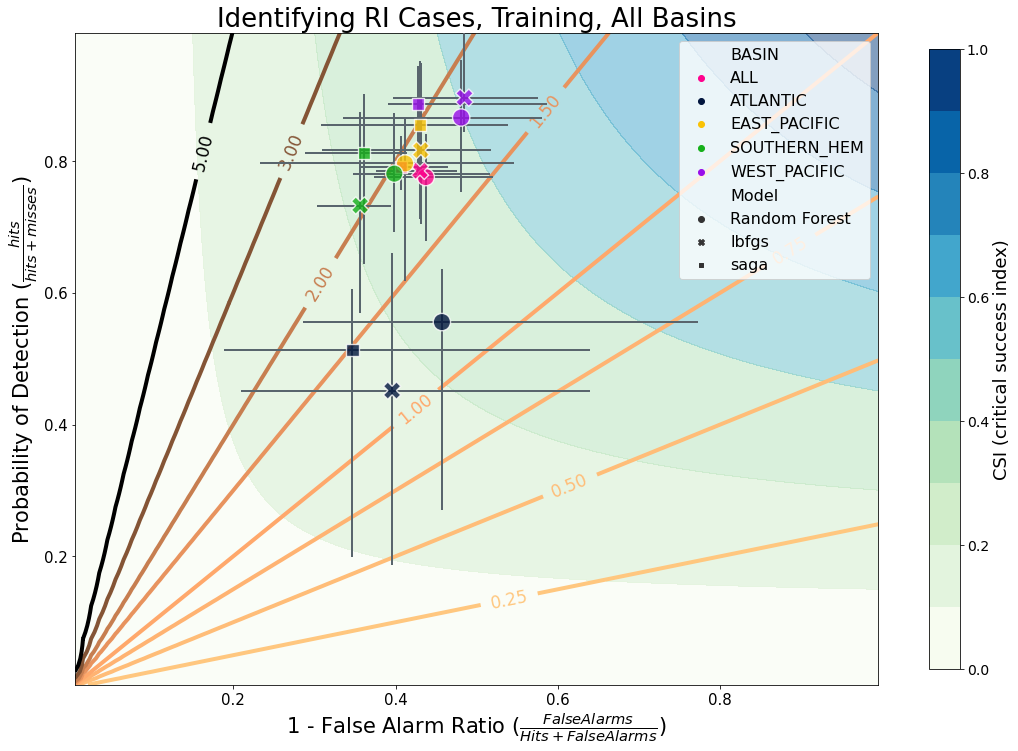

In [11]:
fig5,ax5 = plt.subplots(1,1,figsize=(18,12))
make_performance_diagram_background(ax5)
#for ibasin in basin_foo:
add_model_results(ax5,cm_res)
ax5.set_title('Identifying RI Cases, Training, All Basins',fontsize=26)
fig5.savefig('Figures/PD_all_models_all_basins_{scoring}.{fig_format}'.format(scoring=scoring,fig_format=fig_format),
                format = fig_format,bbox_inches='tight',dpi=350)

/local/home/mmcgraw/SHIPS/SHIPS_clean/SHIPS_plotting.py:214: UserWarning: The following kwargs were not used by contour: 'axes'
  plt.contourf(success_ratio_matrix, pod_matrix, csi_matrix,
/local/home/mmcgraw/SHIPS/SHIPS_clean/SHIPS_plotting.py:229: UserWarning: The following kwargs were not used by contour: 'axes'
  bias_contour_object = plt.contour(


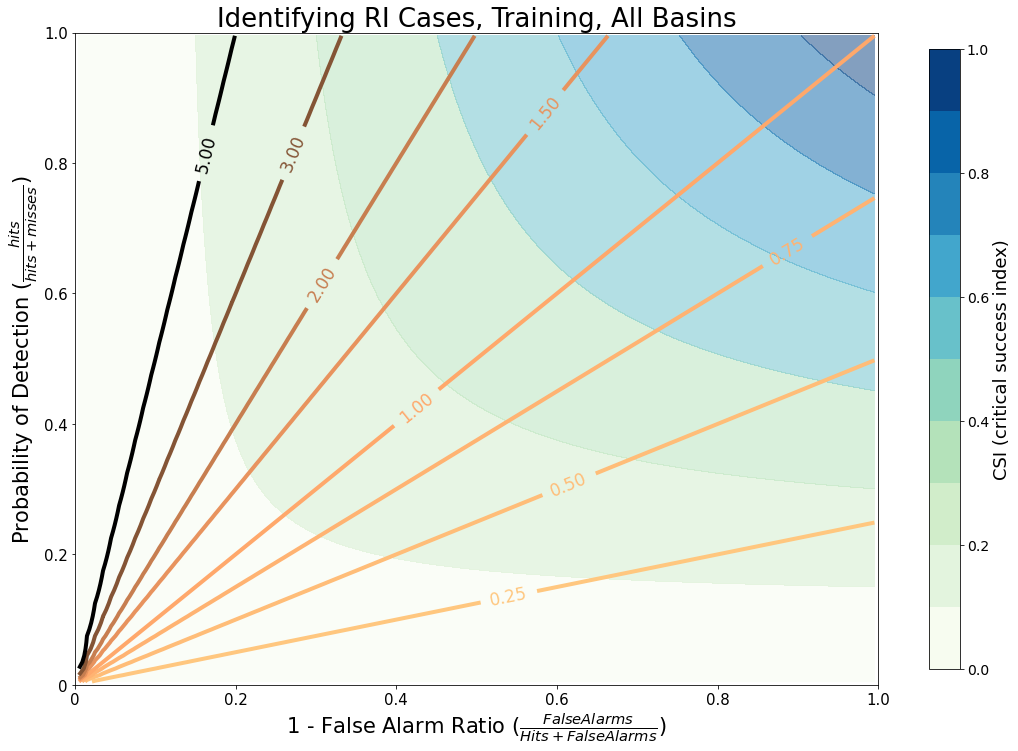

In [12]:
fig5,ax5 = plt.subplots(1,1,figsize=(18,12))
make_performance_diagram_background(ax5)
#for ibasin in basin_foo:
#add_model_results(ax5,cm_res)
ax5.set_title('Identifying RI Cases, Training, All Basins',fontsize=26)
fig5.savefig('Figures/PD_empty_{scoring}.{fig_format}'.format(scoring=scoring,fig_format=fig_format),
                format = fig_format,bbox_inches='tight',dpi=350)

/local/home/mmcgraw/SHIPS/SHIPS_clean/SHIPS_plotting.py:214: UserWarning: The following kwargs were not used by contour: 'axes'
  plt.contourf(success_ratio_matrix, pod_matrix, csi_matrix,
/local/home/mmcgraw/SHIPS/SHIPS_clean/SHIPS_plotting.py:229: UserWarning: The following kwargs were not used by contour: 'axes'
  bias_contour_object = plt.contour(
/local/home/mmcgraw/SHIPS/SHIPS_clean/SHIPS_plotting.py:214: UserWarning: The following kwargs were not used by contour: 'axes'
  plt.contourf(success_ratio_matrix, pod_matrix, csi_matrix,
/local/home/mmcgraw/SHIPS/SHIPS_clean/SHIPS_plotting.py:229: UserWarning: The following kwargs were not used by contour: 'axes'
  bias_contour_object = plt.contour(
/local/home/mmcgraw/SHIPS/SHIPS_clean/SHIPS_plotting.py:214: UserWarning: The following kwargs were not used by contour: 'axes'
  plt.contourf(success_ratio_matrix, pod_matrix, csi_matrix,
/local/home/mmcgraw/SHIPS/SHIPS_clean/SHIPS_plotting.py:229: UserWarning: The following kwargs were not

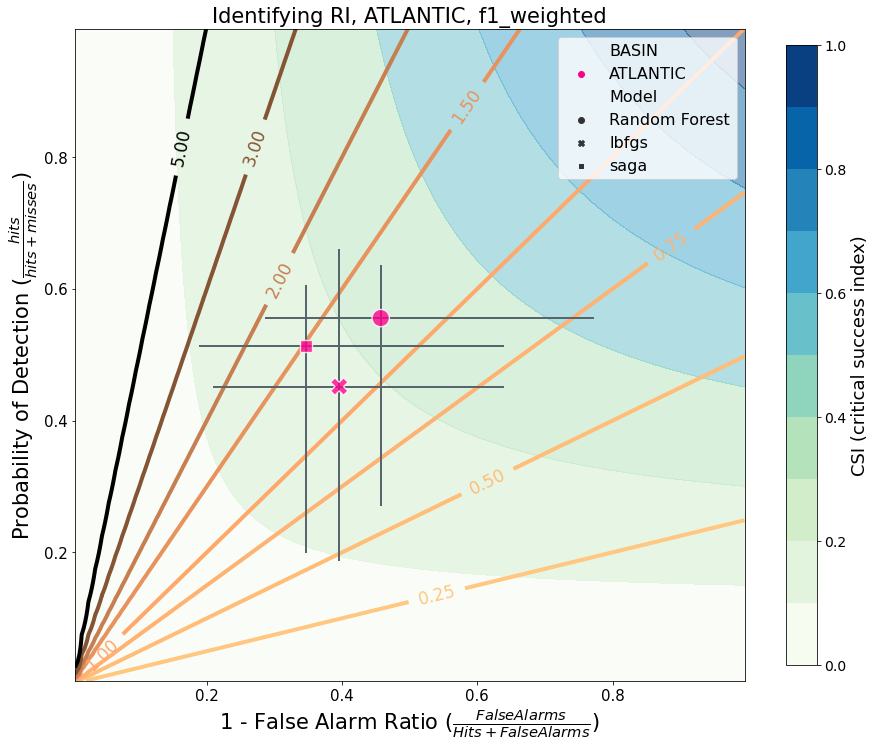

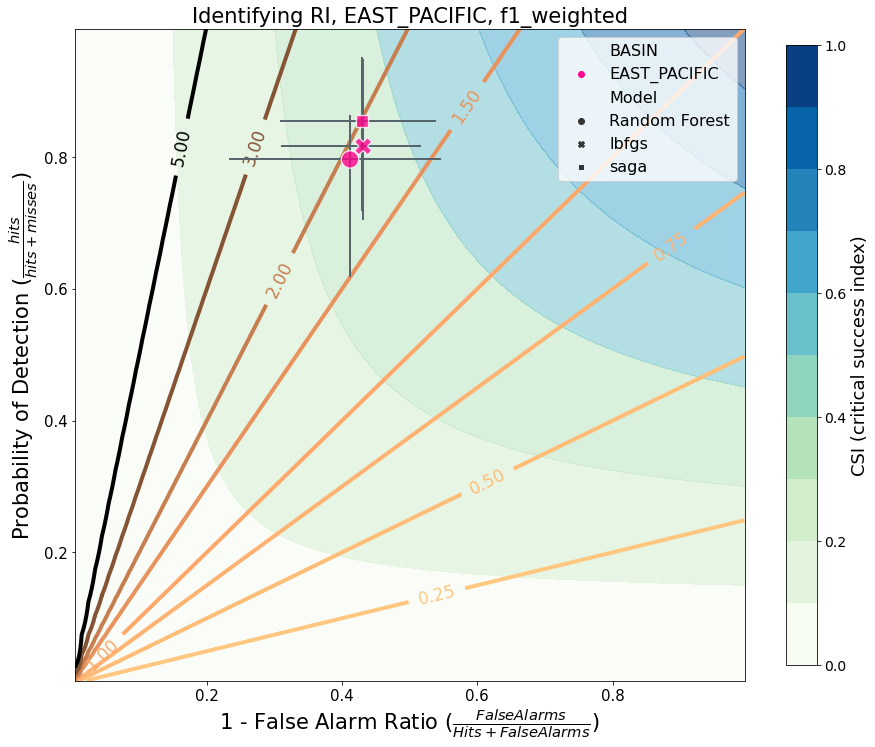

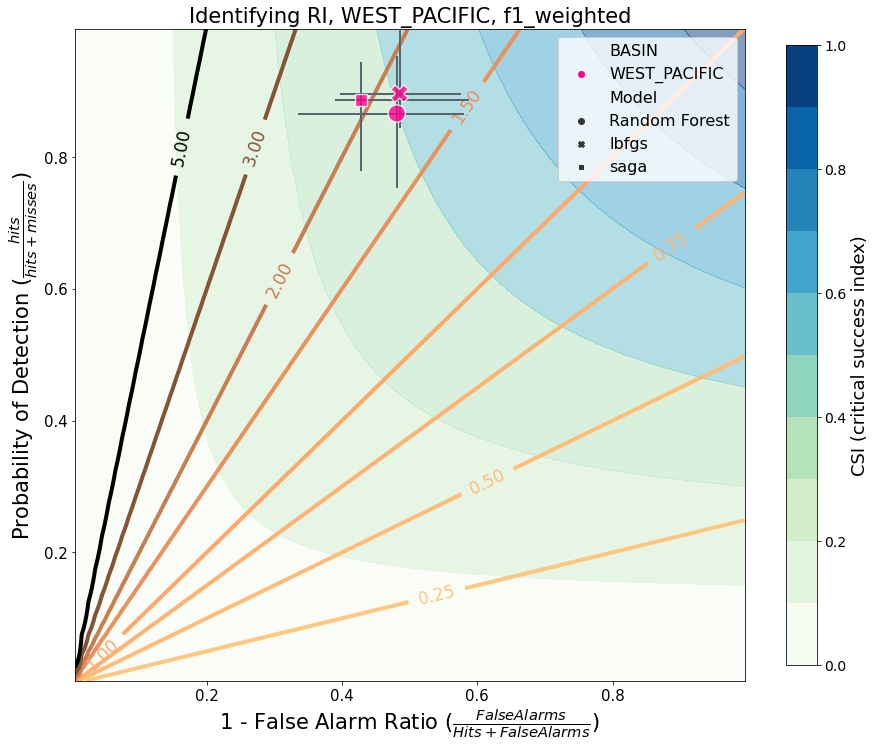

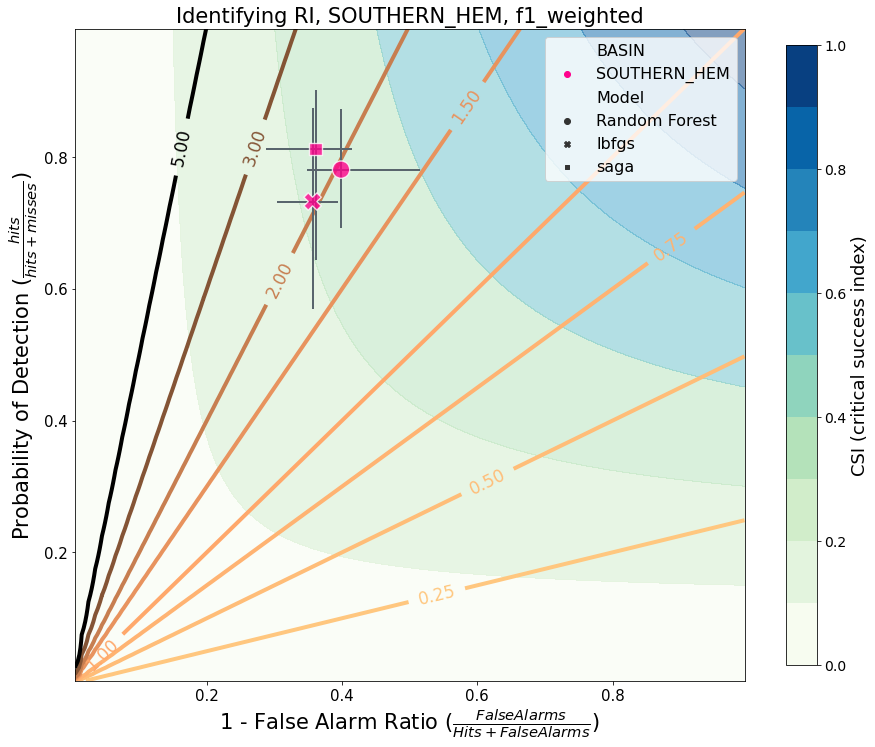

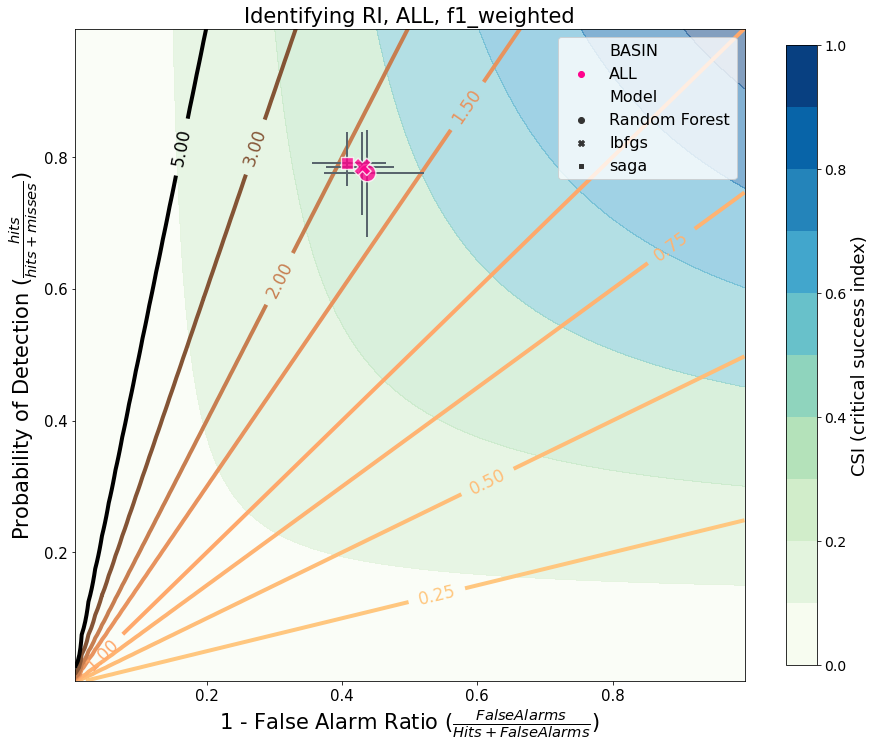

In [13]:
for basin_sel in basin_ALL:
    fig6,ax6 = plt.subplots(1,1,figsize=(15,12))
    #basin_sel = 'ALL'
    cmp = cm_res.set_index(['BASIN']).loc[basin_sel]
    make_performance_diagram_background(ax6)
    add_model_results(ax6,cmp)
    ax6.set_title('{basin}'.format(basin=basin_sel),fontsize=26)
    ax6.set_title('Identifying RI, {basin_sel}, {scoring}'.format(basin_sel=basin_sel,scoring=scoring),fontsize=21)
    fig6.savefig('Figures/PD_all_models_{basin_sel}_{scoring}.{fig_format}'.format(basin_sel=basin_sel,
                   scoring=scoring,fig_format=fig_format),
                format = fig_format,bbox_inches='tight',dpi=350)

#### Get baseline

$$Baseline = \frac{N_{yes}}{N_{yes} + N_{no}} $$

In [14]:
cm_group = cm_res.groupby(['BASIN','Model','Category Names','Fold']).mean()
baselines = cm_group.xs('RI',level=2)['N_actual']/cm_group.xs('not RI',level=2)['N_actual']

#### Plot Precision vs Recall

In [15]:
palette = {'xkcd:turquoise','xkcd:coral','xkcd:tangerine'}
#basin_ALL = cm_res['BASIN'].unique().tolist()

/home/mmcgraw/miniconda3/envs/SHIPS/lib/python3.9/site-packages/IPython/core/interactiveshell.py:2947: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


<AxesSubplot:xlabel='Recall', ylabel='Precision'>

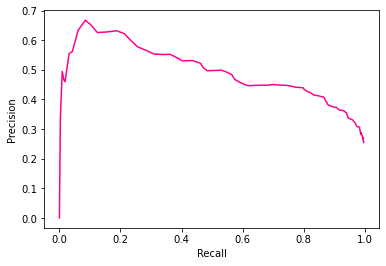

In [16]:
pr_smooth = prec_vs_rec.copy().set_index(['BASIN','Model','CLASS','Fold'])
pr_smooth_x = pr_smooth.xs(('ALL','saga','RI',0)).reset_index()
pr_smooth_x['Thresh rnd'] = pr_smooth_x['Thresholds'].round(2)
prsmplt = pr_smooth_x.groupby(['Thresh rnd']).mean()
sns.lineplot(data=prsmplt.reset_index(),x='Recall',y='Precision')

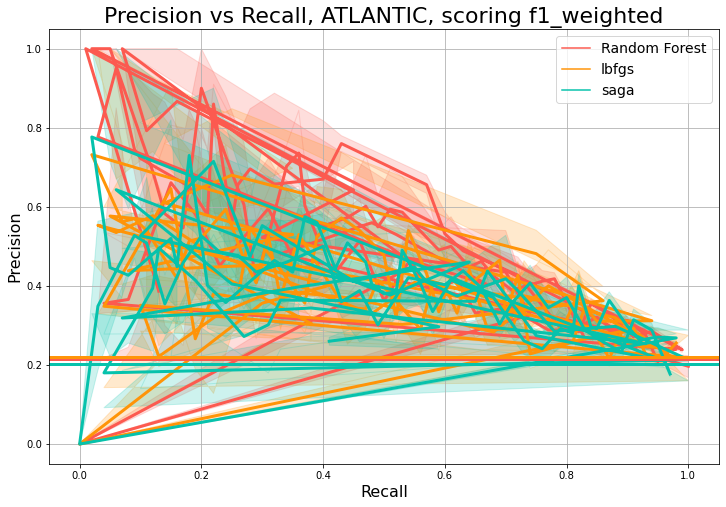

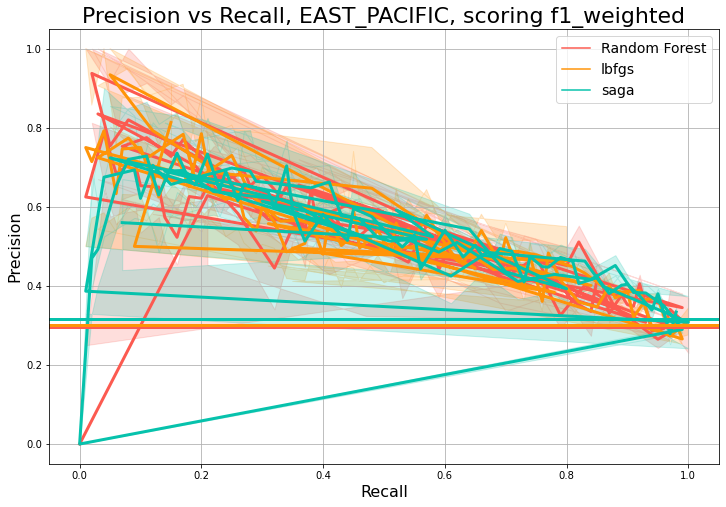

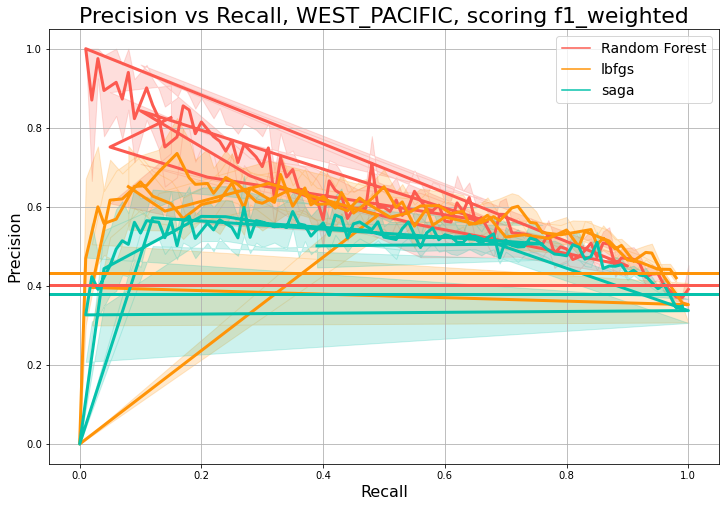

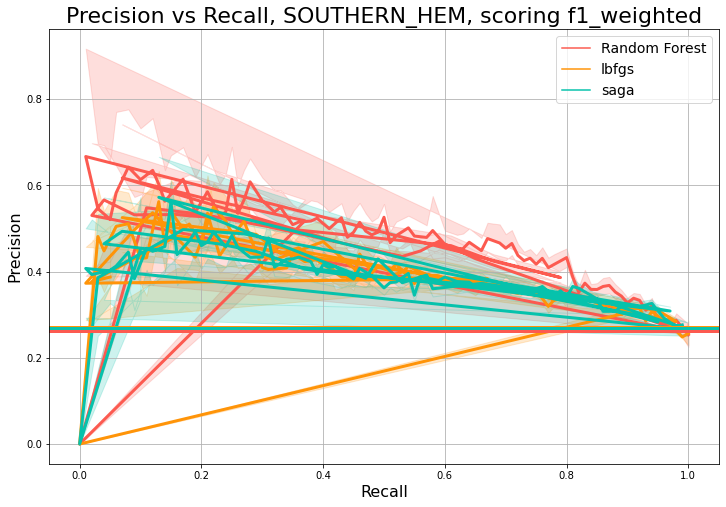

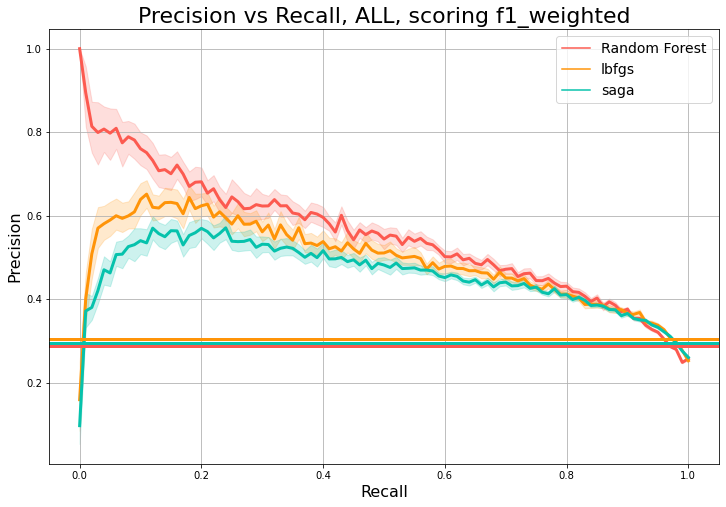

In [17]:
prec_vs_rec_plt = prec_vs_rec.copy()
baselines_mean = baselines.mean(level=(0,1))
prec_vs_rec_plt[['Thresholds (rnd)','Precision (rnd)','Recall (rnd)']] = prec_vs_rec_plt[['Thresholds','Precision','Recall']].round(2)
for basin_sel in basin_ALL:
    fig1, ax1 = plt.subplots(1,1,figsize=(12,8))
    #basin_sel = 'ALL'
    prp = prec_vs_rec_plt.set_index(['BASIN']).loc[basin_sel]
    sns.lineplot(data=prp.reset_index().iloc[::2],x='Recall (rnd)',y='Precision (rnd)',hue='Model',
                 palette=sns.set_palette(palette),linewidth = 3,sort=False)
    #
    ax1.axhline(baselines.xs((basin_sel,'Random Forest')).mean(),
                color=sns.color_palette()[0],linewidth=3)
    ax1.axhline(baselines.xs((basin_sel,'lbfgs')).mean(),
                color=sns.color_palette()[1],linewidth=3)
    ax1.axhline(baselines.xs((basin_sel,'saga')).mean(),
                color=sns.color_palette()[2],linewidth=3)
    ax1.set_xlabel('Recall',fontsize=16)
    ax1.set_ylabel('Precision',fontsize=16)
    ax1.grid()
    ax1.legend(fontsize=14)
    ax1.set_title('Precision vs Recall, {basin_sel}, scoring {scoring}'.format(basin_sel=basin_sel,scoring=scoring),fontsize=22)
    fig1.savefig('Figures/Precision_vs_Recall_all_models_{basin_sel}_{scoring}.{fig_format}'.format(basin_sel=basin_sel,
                                scoring=scoring,fig_format=fig_format),
                format = fig_format,bbox_inches='tight',dpi=350)


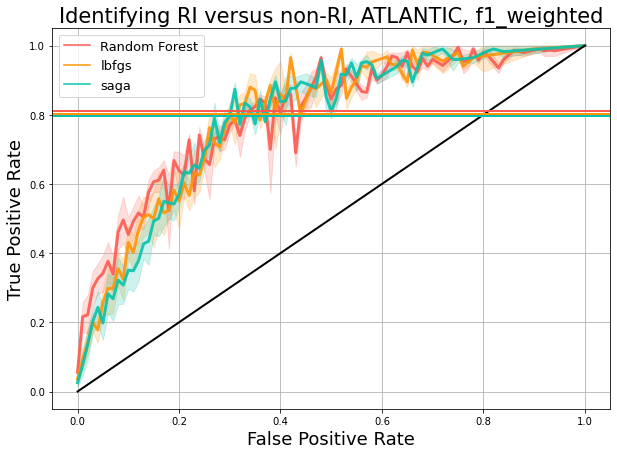

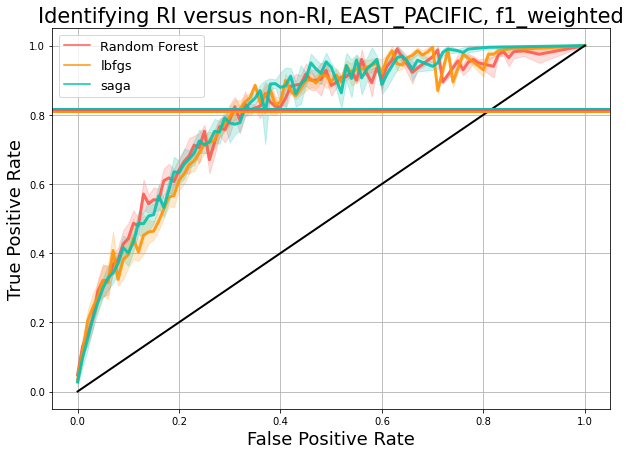

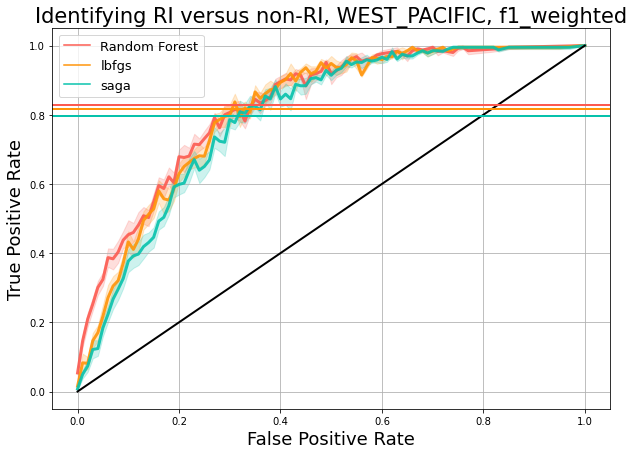

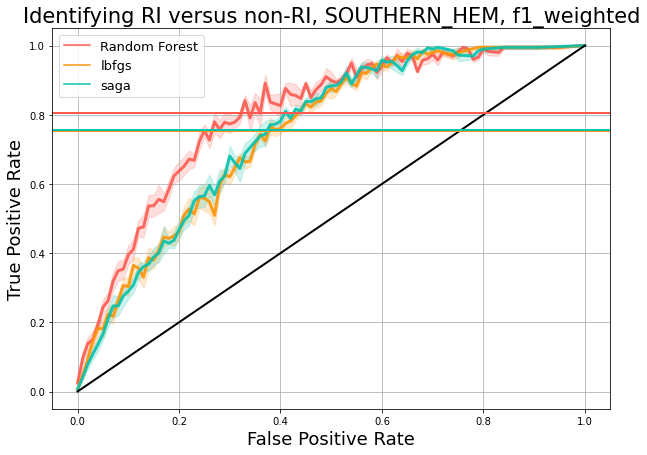

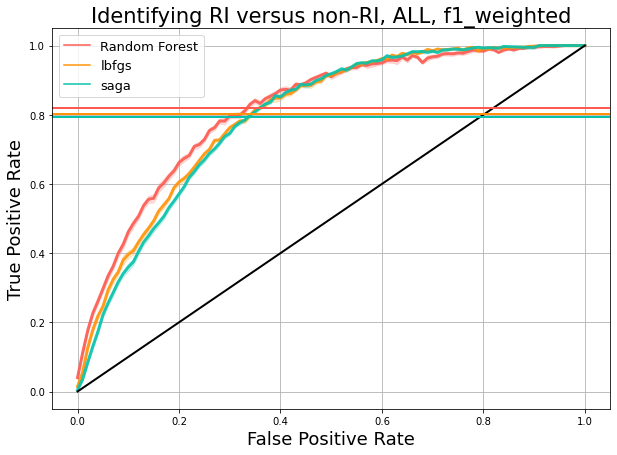

In [18]:
for basin_sel in basin_ALL:
#basin_sel = 'ALL'
    fig2,ax2 = plt.subplots(1,1,figsize=(10,7))

    roc_vals_plt = roc_res.set_index(['BASIN']).xs(basin_sel).reset_index()
    roc_vals_plt[['FPR round','TPR round']] = roc_vals_plt[['False Positive Rate','True Positive Rate']].round(2)
    #roc_min = roc_vals_plt['AUC ROC Score'].min()
    #roc_max = roc_vals_plt['AUC ROC Score'].max()

    sns.lineplot(data=roc_vals_plt,x='FPR round',y='TPR round',hue='Model',ax=ax2,
                alpha=0.9,linewidth=3)
    ax2.plot([0,1],[0,1],color='k',linewidth=2)
    #
    auc_scores = roc_vals_plt.groupby(['Model'])['AUC ROC Score'].mean()
    ax2.axhline(auc_scores.loc['Random Forest'],color=sns.color_palette()[0],linewidth=2)
    ax2.axhline(auc_scores.loc['lbfgs'],color=sns.color_palette()[1],linewidth=2)
    ax2.axhline(auc_scores.loc['saga'],color=sns.color_palette()[2],linewidth=2)
    #ax2.axhspan(roc_min,roc_max,color='xkcd:gray',alpha=0.25,label='AUC Score')
    ax2.set_xlabel('False Positive Rate',fontsize=18)
    ax2.set_ylabel('True Positive Rate',fontsize=18)
    #roc_vals_mean = roc_vals_plt.groupby(roc_vals_plt['False Positive Rate'].round(2))[['True Positive Rate',
    #                                'AUC Thresholds']].mean().reset_index()
    #roc_vals_mean.plot(x='False Positive Rate',y='True Positive Rate',ax=ax2,color='xkcd:tangerine',linewidth=5,
    #                  label='ROC curve')
    ax2.legend(fontsize=13)
    ax2.grid()
    ax2.set_title('Identifying RI versus non-RI, {basin_sel}, {scoring}'.format(basin_sel=basin_sel,scoring=scoring),fontsize=21)
    fig2.savefig('Figures/ROC_all_models_{basin_sel}_{scoring}.{fig_format}'.format(basin_sel=basin_sel,
                                            scoring=scoring,fig_format=fig_format),
                format = fig_format,bbox_inches='tight',dpi=350)

In [19]:
cm_res['BIAS'] = (cm_res['Hits']+cm_res['False Alarms'])/(cm_res['Hits'] + cm_res['Misses'])


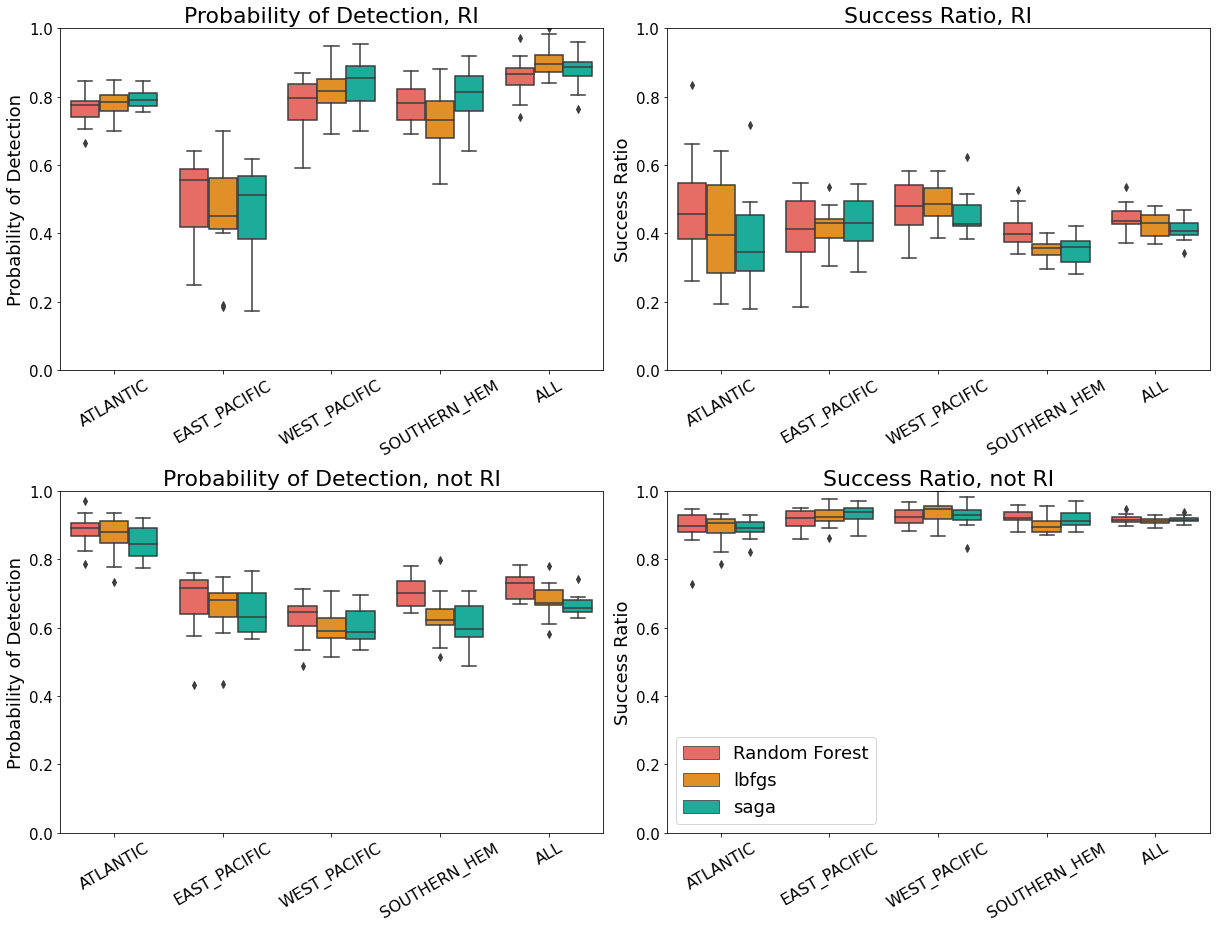

In [20]:
fig6,((ax6a,ax6b),(ax6c,ax6d)) = plt.subplots(2,2,figsize=(17,13))
cm_plt = cm_res.set_index(['Category Names'])
cm_plt_total = cm_plt.reset_index().groupby(['Category Names','BASIN','Model','Fold']).mean()
#cm_plt_norm = 
sns.boxplot(data=cm_plt_total.xs('RI').reset_index(),x='BASIN',y='POD',hue='Model',ax=ax6a)
ax6a.set_ylabel('Probability of Detection',fontsize=18)
ax6a.get_legend().remove()
#ax6a.legend(fontsize=12)
ax6a.set_xticklabels(basin_ALL,fontsize=16,rotation=30)
ax6a.set_title('Probability of Detection, RI',fontsize=22)
ax6a.set_xlabel(None)
ax6a.set_ylim([0,1])
ax6a.tick_params(axis='y',labelsize=15)
#
sns.boxplot(data=cm_plt.xs('RI').reset_index(),x='BASIN',y='SR',hue='Model',ax=ax6b)
ax6b.set_ylabel('Success Ratio',fontsize=18)
#ax6b.legend(fontsize=12)
ax6b.get_legend().remove()
ax6b.set_xticklabels(basin_ALL,fontsize=16,rotation=30)
ax6b.set_title('Success Ratio, RI',fontsize=22)
ax6b.set_xlabel(None)
ax6b.set_ylim([0,1])
ax6b.tick_params(axis='y',labelsize=15)
#
sns.boxplot(data=cm_plt.xs('not RI').reset_index(),x='BASIN',y='POD',hue='Model',ax=ax6c)
ax6c.set_ylabel('Probability of Detection',fontsize=18)
#ax6c.legend(fontsize=12)
ax6c.get_legend().remove()
ax6c.set_xticklabels(basin_ALL,fontsize=16,rotation=30)
ax6c.set_title('Probability of Detection, not RI',fontsize=22)
ax6c.set_xlabel(None)
ax6c.tick_params(axis='y',labelsize=15)
ax6c.set_ylim([0,1])
#
sns.boxplot(data=cm_plt.xs('not RI').reset_index(),x='BASIN',y='SR',hue='Model',ax=ax6d)
ax6d.set_ylabel('Success Ratio',fontsize=18)
ax6d.legend(fontsize=18)
ax6d.set_xticklabels(basin_ALL,fontsize=16,rotation=30)
ax6d.set_title('Success Ratio, not RI',fontsize=22)
ax6d.set_xlabel(None)
ax6d.tick_params(axis='y',labelsize=15)
ax6d.set_ylim([0,1])
#
fig6.tight_layout()
#fig6.suptitle('Probability o')
fig6.savefig('Figures/POD_SR_all_models_all_basins_{scoring}.{fig_format}'.format(scoring=scoring,fig_format=fig_format),
                format = fig_format,bbox_inches='tight',dpi=350)

Performance diagram

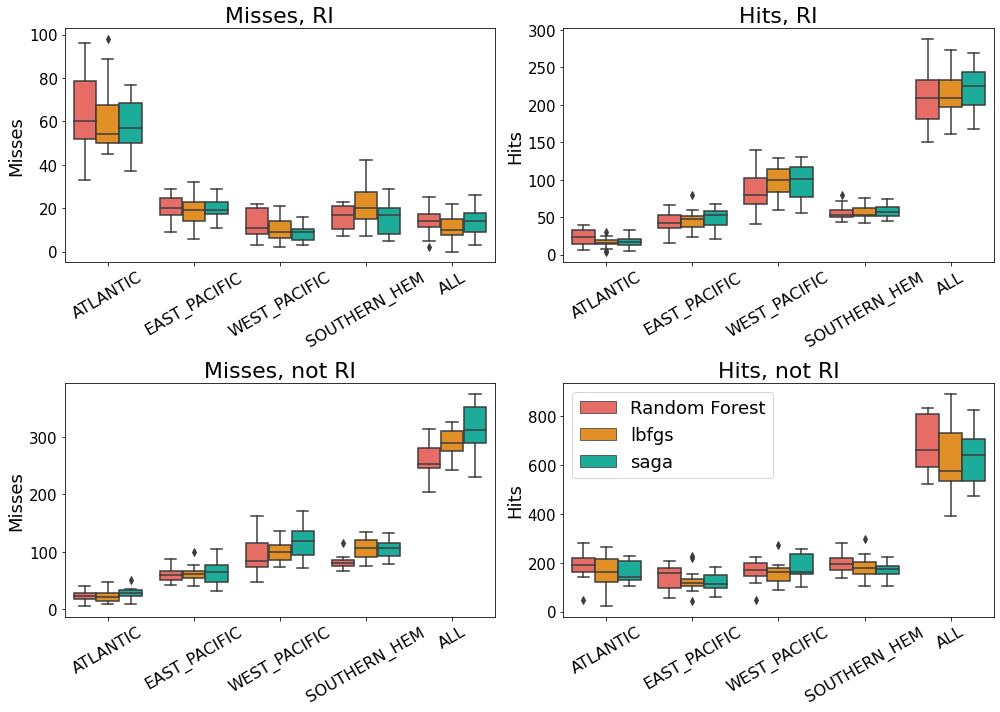

In [21]:
fig6,((ax6a,ax6b),(ax6c,ax6d)) = plt.subplots(2,2,figsize=(14,10))
cm_plt = cm_res.set_index(['Category Names'])
cm_plt_total = cm_plt.reset_index().groupby(['Category Names','BASIN','Model','Fold']).mean()
#cm_plt_norm = 
sns.boxplot(data=cm_plt_total.xs('RI').reset_index(),x='BASIN',y='Misses',hue='Model',ax=ax6a)
ax6a.set_ylabel('Misses',fontsize=18)
ax6a.get_legend().remove()
ax6a.set_xticklabels(basin_ALL,fontsize=16,rotation=30)
ax6a.set_title('Misses, RI',fontsize=22)
ax6a.set_xlabel(None)
ax6a.tick_params(axis='y',labelsize=15)
#ax6a.set_ylim([0,150])
#
sns.boxplot(data=cm_plt.xs('RI').reset_index(),x='BASIN',y='Hits',hue='Model',ax=ax6b)
ax6b.set_ylabel('Hits',fontsize=18)
ax6b.get_legend().remove()
ax6b.set_xticklabels(basin_ALL,fontsize=16,rotation=30)
ax6b.set_title('Hits, RI',fontsize=22)
ax6b.set_xlabel(None)
ax6b.tick_params(axis='y',labelsize=15)
#
sns.boxplot(data=cm_plt.xs('not RI').reset_index(),x='BASIN',y='Misses',hue='Model',ax=ax6c)
ax6c.set_ylabel('Misses',fontsize=18)
ax6c.get_legend().remove()
ax6c.set_xticklabels(basin_ALL,fontsize=16,rotation=30)
ax6c.set_title('Misses, not RI',fontsize=22)
ax6c.set_xlabel(None)
ax6c.tick_params(axis='y',labelsize=15)
#
sns.boxplot(data=cm_plt.xs('not RI').reset_index(),x='BASIN',y='Hits',hue='Model',ax=ax6d)
ax6d.set_ylabel('Hits',fontsize=18)
ax6d.legend(fontsize=18)
ax6d.set_xticklabels(basin_ALL,fontsize=16,rotation=30)
ax6d.set_title('Hits, not RI',fontsize=22)
ax6d.set_xlabel(None)
ax6d.tick_params(axis='y', labelsize= 15)

#
fig6.tight_layout()
fig6.savefig('Figures/Misses_Hits_all_models_all_basins_{scoring}.{fig_format}'.format(scoring=scoring,
                       fig_format=fig_format),format = fig_format,bbox_inches='tight',dpi=350)

In [22]:
cm_plt.columns

Index(['Unnamed: 0', 'N_actual', 'Hits', 'PFOD', 'Threat', 'FAR', 'SR',
       'False Alarms', 'Correct Negs', 'Category', 'POD', 'N_predicted',
       'Misses', 'BIAS', 'BASIN', 'Max Depth', 'Max Features', 'N Estimators',
       'Min Samples Leaf', 'Max Iter', 'Years Out', 'Model', 'Fold', 'C'],
      dtype='object')

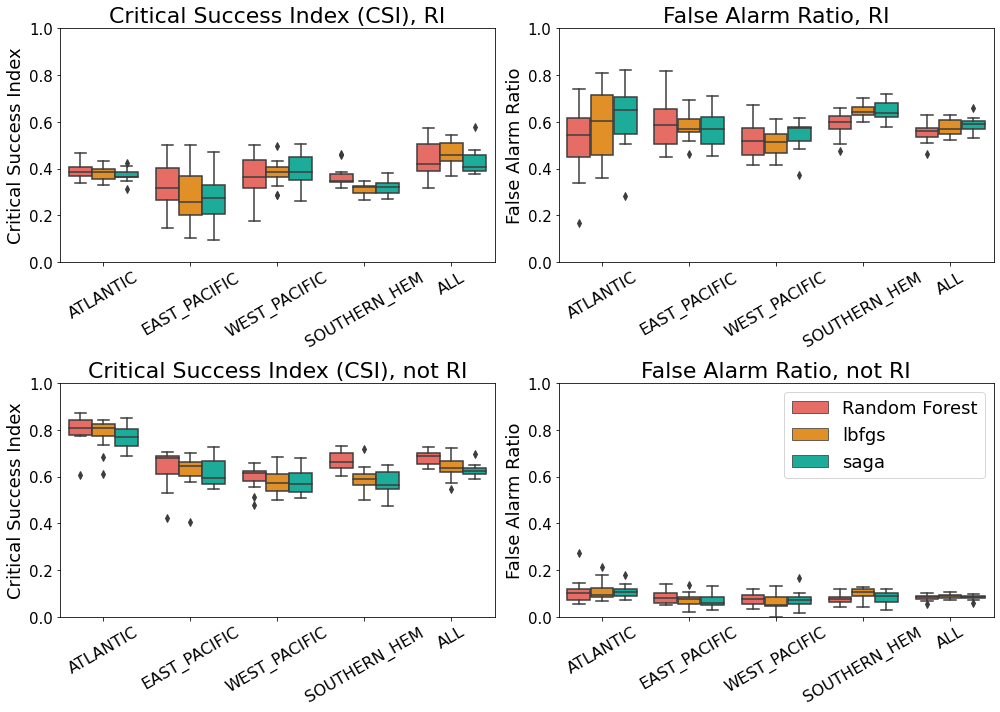

In [23]:
fig6,((ax6a,ax6b),(ax6c,ax6d)) = plt.subplots(2,2,figsize=(14,10))
cm_plt = cm_res.set_index(['Category Names'])
cm_plt_total = cm_plt.reset_index().groupby(['Category Names','BASIN','Model','Fold']).mean()
#cm_plt_norm = 
sns.boxplot(data=cm_plt_total.xs('RI').reset_index(),x='BASIN',y='Threat',hue='Model',ax=ax6a)
ax6a.set_ylabel('Critical Success Index',fontsize=18)
ax6a.get_legend().remove()
ax6a.set_xticklabels(basin_ALL,fontsize=16,rotation=30)
ax6a.set_title('Critical Success Index (CSI), RI',fontsize=22)
ax6a.set_xlabel(None)
ax6a.tick_params(axis='y',labelsize=15)
ax6a.set_ylim([0,1])
#ax6a.set_ylim([0,150])
#
sns.boxplot(data=cm_plt.xs('RI').reset_index(),x='BASIN',y='FAR',hue='Model',ax=ax6b)
ax6b.set_ylabel('False Alarm Ratio',fontsize=18)
ax6b.get_legend().remove()
ax6b.set_xticklabels(basin_ALL,fontsize=16,rotation=30)
ax6b.set_title('False Alarm Ratio, RI',fontsize=22)
ax6b.set_xlabel(None)
ax6b.tick_params(axis='y',labelsize=15)
ax6b.set_ylim([0,1])
#
sns.boxplot(data=cm_plt.xs('not RI').reset_index(),x='BASIN',y='Threat',hue='Model',ax=ax6c)
ax6c.set_ylabel('Critical Success Index',fontsize=18)
ax6c.get_legend().remove()
ax6c.set_xticklabels(basin_ALL,fontsize=16,rotation=30)
ax6c.set_title('Critical Success Index (CSI), not RI',fontsize=22)
ax6c.set_xlabel(None)
ax6c.tick_params(axis='y',labelsize=15)
ax6c.set_ylim([0,1])
#
sns.boxplot(data=cm_plt.xs('not RI').reset_index(),x='BASIN',y='FAR',hue='Model',ax=ax6d)
ax6d.set_ylabel('False Alarm Ratio',fontsize=18)
ax6d.legend(fontsize=18)
ax6d.set_xticklabels(basin_ALL,fontsize=16,rotation=30)
ax6d.set_title('False Alarm Ratio, not RI',fontsize=22)
ax6d.set_xlabel(None)
ax6d.tick_params(axis='y', labelsize= 15)
ax6d.set_ylim([0,1])
#
fig6.tight_layout()
fig6.savefig('Figures/Threat_FAR_all_models_all_basins_{scoring}.{fig_format}'.format(scoring=scoring,fig_format=fig_format),
                format = fig_format,bbox_inches='tight',dpi=350)

#### Yvals

In [24]:
y_vals = y_vals.rename(columns={'I_class':'Y actual'})
y_plot = y_vals#.set_index(['Predicted Basin']).xs('ATLANTIC').reset_index()

#

In [25]:
y_plot2 = y_plot.where(y_plot['Y actual']==1).dropna(how='all')
y_plot0 = y_plot.where(y_plot['Y actual']==0).dropna(how='all')

##### On actual RI days, what was our predicted probability of RI? 
If we know we observed RI, how likely were our models to predict RI? 

If we know we did NOT observe RI, how likely were our models to predict RI? 

Text(0.5, 1.05, 'How Did Models Do For Observed RI Cases?')

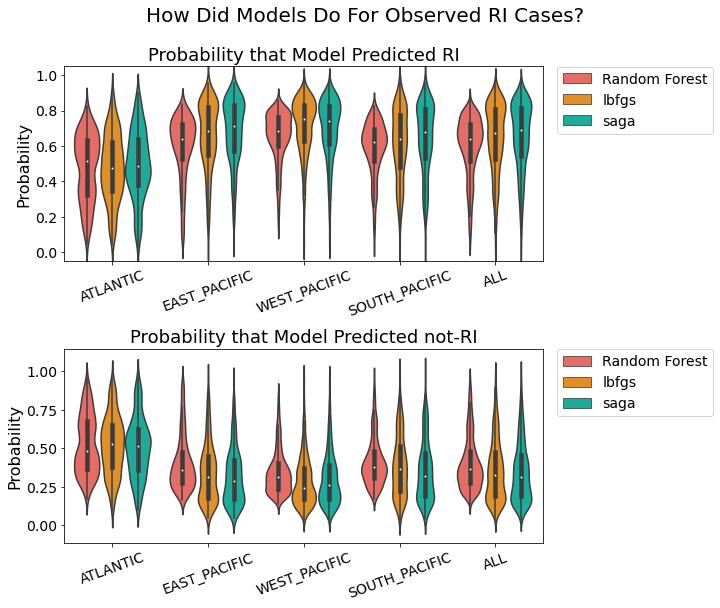

In [26]:
fig20,(ax20a,ax20b) = plt.subplots(2,1,figsize=(10,8))
sns.violinplot(data=y_plot2,x='Predicted Basin',y='Y pred probab (class: 1)',hue='Model',ax=ax20a)
ax20a.legend(bbox_to_anchor=(1.015, 0.915, 0.13, 0.12), loc='upper left',fontsize=14)
ax20a.set_ylabel('Probability',fontsize=16)
ax20a.set_ylim([-0.05,1.05])
ax20a.tick_params(axis='y',labelsize=14)
ax20a.set_xlabel(None)
ax20a.set_xticklabels(y_plot2['Predicted Basin'].unique(),fontsize=14,rotation=20)
ax20a.set_title('Probability that Model Predicted RI',fontsize=18)
#
sns.violinplot(data=y_plot2,x='Predicted Basin',y='Y pred probab (class: 0)',hue='Model',ax=ax20b)
ax20b.legend(bbox_to_anchor=(1.015, 0.915, 0.13, 0.12), loc='upper left',fontsize=14)
ax20b.set_ylabel('Probability',fontsize=16)
#ax20a.set_ylim([-0.05,1.05])
ax20b.tick_params(axis='y',labelsize=14)
#ax20a.set_yticklabels([-0.2,0,0.2,0.4,0.6,0.8,1.0,1.2],fontsize=14)
ax20b.set_xticklabels(y_plot2['Predicted Basin'].unique(),fontsize=14,rotation=20)
ax20b.set_xlabel(None)
ax20b.set_title('Probability that Model Predicted not-RI',fontsize=18)
#
fig20.tight_layout()
fig20.suptitle('How Did Models Do For Observed RI Cases?',fontsize=20,y=1.05)

Text(0.5, 1.05, 'How Did Models Do For Observed not-RI Cases?')

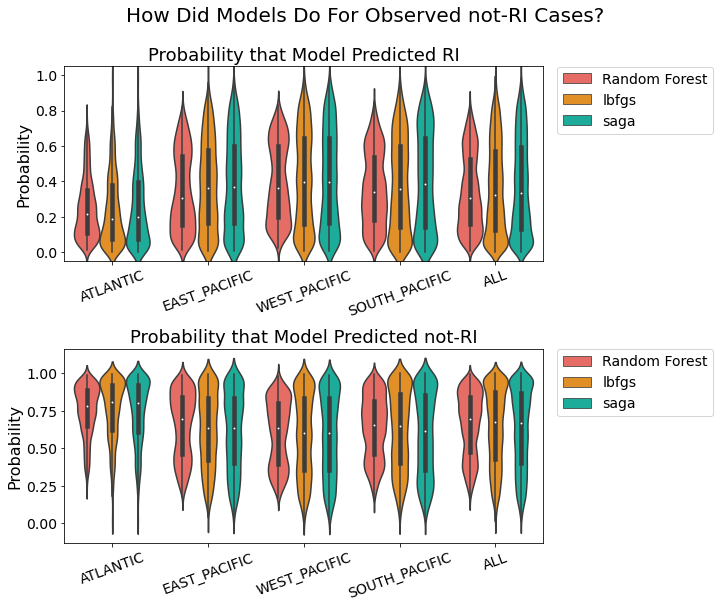

In [27]:
fig20,(ax20a,ax20b) = plt.subplots(2,1,figsize=(10,8))
sns.violinplot(data=y_plot0,x='Predicted Basin',y='Y pred probab (class: 1)',hue='Model',ax=ax20a)
ax20a.legend(bbox_to_anchor=(1.015, 0.915, 0.13, 0.12), loc='upper left',fontsize=14)
ax20a.set_ylabel('Probability',fontsize=16)
ax20a.set_ylim([-0.05,1.05])
ax20a.tick_params(axis='y',labelsize=14)
ax20a.set_xlabel(None)
ax20a.set_xticklabels(y_plot2['Predicted Basin'].unique(),fontsize=14,rotation=20)
ax20a.set_title('Probability that Model Predicted RI',fontsize=18)
#
sns.violinplot(data=y_plot0,x='Predicted Basin',y='Y pred probab (class: 0)',hue='Model',ax=ax20b)
ax20b.legend(bbox_to_anchor=(1.015, 0.915, 0.13, 0.12), loc='upper left',fontsize=14)
ax20b.set_ylabel('Probability',fontsize=16)
#ax20a.set_ylim([-0.05,1.05])
ax20b.tick_params(axis='y',labelsize=14)
#ax20a.set_yticklabels([-0.2,0,0.2,0.4,0.6,0.8,1.0,1.2],fontsize=14)
ax20b.set_xticklabels(y_plot2['Predicted Basin'].unique(),fontsize=14,rotation=20)
ax20b.set_xlabel(None)
ax20b.set_title('Probability that Model Predicted not-RI',fontsize=18)
#
fig20.tight_layout()
fig20.suptitle('How Did Models Do For Observed not-RI Cases?',fontsize=20,y=1.05)

In [28]:
#y_vals

/local/home/mmcgraw/SHIPS/SHIPS_clean/SHIPS_plotting.py:214: UserWarning: The following kwargs were not used by contour: 'axes'
  plt.contourf(success_ratio_matrix, pod_matrix, csi_matrix,
/local/home/mmcgraw/SHIPS/SHIPS_clean/SHIPS_plotting.py:229: UserWarning: The following kwargs were not used by contour: 'axes'
  bias_contour_object = plt.contour(


Random Forest
lbfgs
saga


/local/home/mmcgraw/SHIPS/SHIPS_clean/SHIPS_plotting.py:214: UserWarning: The following kwargs were not used by contour: 'axes'
  plt.contourf(success_ratio_matrix, pod_matrix, csi_matrix,
/local/home/mmcgraw/SHIPS/SHIPS_clean/SHIPS_plotting.py:229: UserWarning: The following kwargs were not used by contour: 'axes'
  bias_contour_object = plt.contour(


Random Forest
lbfgs
saga


/local/home/mmcgraw/SHIPS/SHIPS_clean/SHIPS_plotting.py:214: UserWarning: The following kwargs were not used by contour: 'axes'
  plt.contourf(success_ratio_matrix, pod_matrix, csi_matrix,
/local/home/mmcgraw/SHIPS/SHIPS_clean/SHIPS_plotting.py:229: UserWarning: The following kwargs were not used by contour: 'axes'
  bias_contour_object = plt.contour(


Random Forest
lbfgs
saga


/local/home/mmcgraw/SHIPS/SHIPS_clean/SHIPS_plotting.py:214: UserWarning: The following kwargs were not used by contour: 'axes'
  plt.contourf(success_ratio_matrix, pod_matrix, csi_matrix,
/local/home/mmcgraw/SHIPS/SHIPS_clean/SHIPS_plotting.py:229: UserWarning: The following kwargs were not used by contour: 'axes'
  bias_contour_object = plt.contour(


Random Forest
lbfgs
saga


/local/home/mmcgraw/SHIPS/SHIPS_clean/SHIPS_plotting.py:214: UserWarning: The following kwargs were not used by contour: 'axes'
  plt.contourf(success_ratio_matrix, pod_matrix, csi_matrix,
/local/home/mmcgraw/SHIPS/SHIPS_clean/SHIPS_plotting.py:229: UserWarning: The following kwargs were not used by contour: 'axes'
  bias_contour_object = plt.contour(


Random Forest
lbfgs
saga


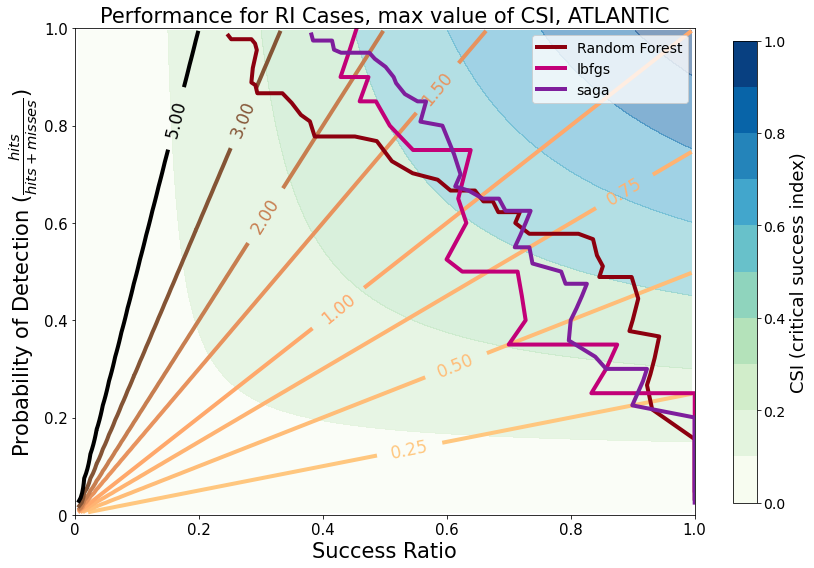

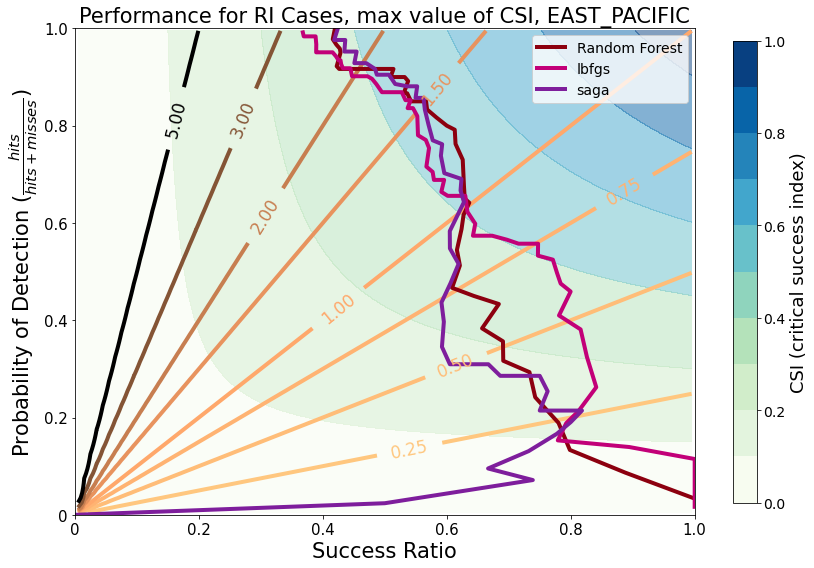

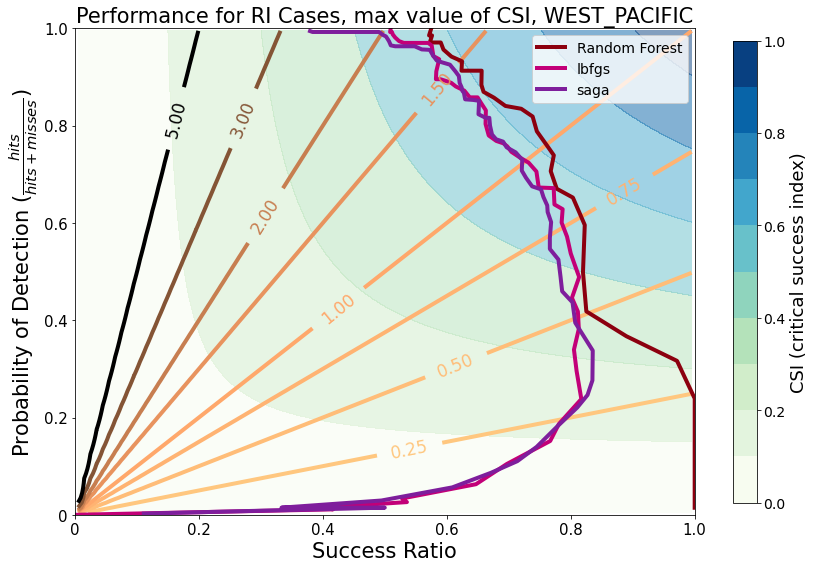

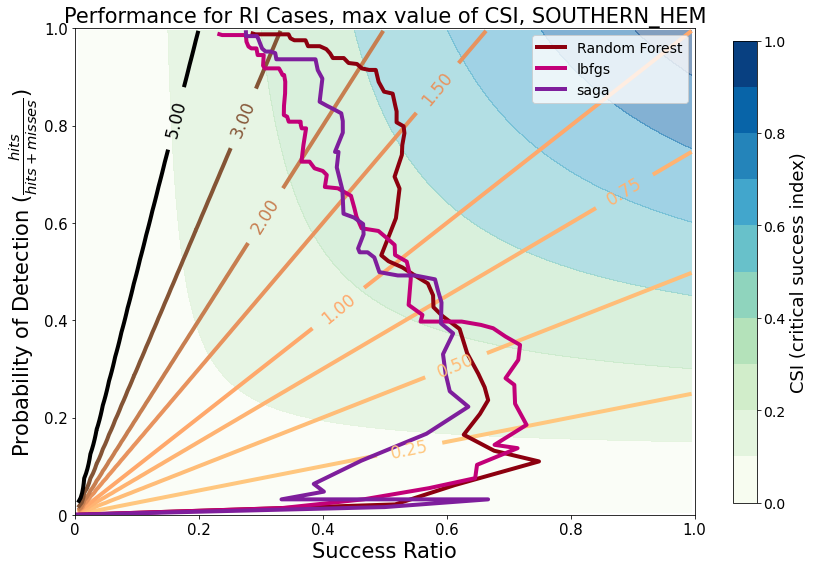

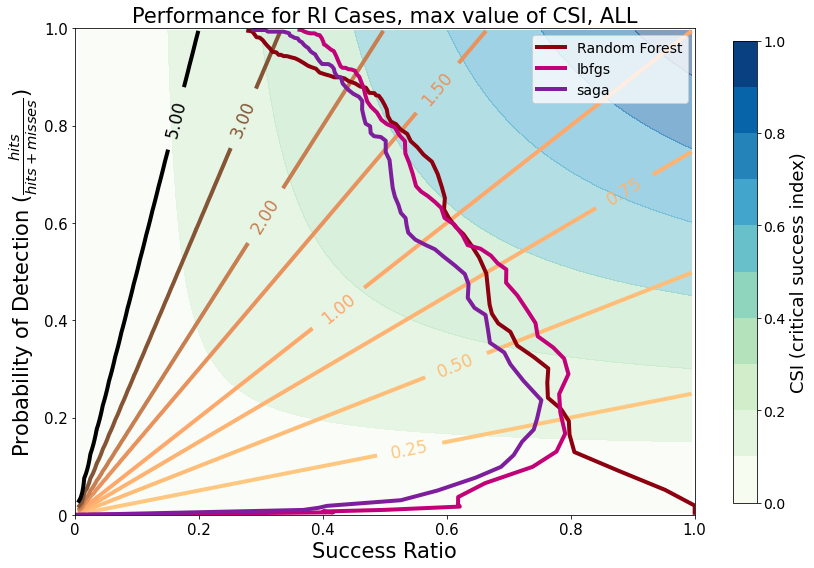

In [29]:
pd_curves = calculate_PD_curves(prec_vs_rec)
metric_plt = 'max'
for basin_sel in basin_ALL:
    fig23,ax23 = plt.subplots(1,1,figsize=(12,8))
    make_performance_diagram_background(ax23)
    #basin_sel = 'ALL'
    #
    plot_PD_curves_compare_models(prec_vs_rec,ax23,basin_sel,metric_plt)
    ax23.set_title('Performance for RI Cases, {metric_plt} value of CSI, {basin_sel}'.format(metric_plt=metric_plt,
                                                                            basin_sel=basin_sel),fontsize=21)
    fig23.tight_layout()
    fig23.savefig('Figures/Performance_curves_RI_{metric_plt}_CSI_{basin_sel}.{fig_format}'.format(metric_plt=metric_plt,
                           basin_sel=basin_sel,fig_format=fig_format), format =fig_format,bbox_inches='tight',dpi=350)

In [30]:
aupd_scores = calc_AUPD(prec_vs_rec)
aupd_scores = aupd_scores.reset_index().rename(columns={0:'AUPD Score'})

#### Maximum CSI

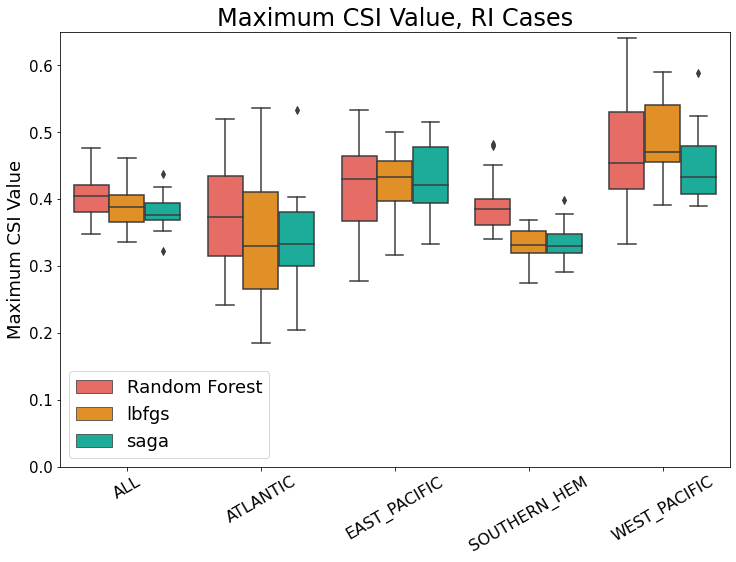

In [31]:
max_CSI_ind = prec_vs_rec.groupby(['BASIN','Model','Fold'])[['CSI','Bias']].agg({'CSI':'max'}).reset_index()

fig16,ax16 = plt.subplots(1,1,figsize=(12,8))
is_swarm = False
if is_swarm:
    sns.swarmplot(data=max_CSI_ind,x='BASIN',y='CSI',hue='Model',ax=ax16,s=12)
    fname_save = 'Figures/max_CSI_values_SWARM.{fig_format}'.format(fig_format=fig_format)
else:
    sns.boxplot(data=max_CSI_ind,x='BASIN',y='CSI',hue='Model',ax=ax16)
    fname_save = 'Figures/max_CSI_values_BOX.{fig_format}'.format(fig_format=fig_format)
ax16.set_xlabel(None)
ax16.set_xticklabels(aupd_scores.reset_index()['BASIN'].unique().tolist(),fontsize=16,rotation=30)
ax16.set_ylabel('Maximum CSI Value',fontsize=18)
ax16.tick_params(axis='y',labelsize=15)
ax16.legend(fontsize=18)
ax16.set_ylim([0,0.65])
ax16.set_title('Maximum CSI Value, RI Cases',fontsize=24)
fig16.savefig(fname_save,format=fig_format,dpi=350,bbox_inches='tight')

#### CSI vs Bias

In [130]:
foo2 = foo.reset_index()
smoo = foo2[foo2['CSI'].isin(boo.reset_index()['CSI'])]
smoo.groupby(['BASIN','Model']).mean().reset_index()

BASIN          Model  Fold  Unnamed: 0  Cutoff Threshold  \
0            ALL  Random Forest   8.0       764.0          0.491356   
1            ALL          lbfgs   3.0       881.0          0.499986   
2            ALL           saga   7.0       453.0          0.560663   
3       ATLANTIC  Random Forest  11.0       114.0          0.319897   
4       ATLANTIC          lbfgs   0.0        82.0          0.302731   
5       ATLANTIC           saga   9.0        92.5          0.476270   
6   EAST_PACIFIC  Random Forest  13.0        41.0          0.485894   
7   EAST_PACIFIC          lbfgs   0.0        52.0          0.552595   
8   EAST_PACIFIC           saga   3.0       136.5          0.760309   
9   SOUTHERN_HEM  Random Forest   1.0       139.0          0.609643   
10  SOUTHERN_HEM          lbfgs   4.0       169.0          0.513151   
11  SOUTHERN_HEM           saga  12.0       117.0          0.507714   
12  WEST_PACIFIC  Random Forest  10.5       135.5          0.617521   
13  WEST_PACIFIC          lbfgs   2.0        82.0          0.532506   
14  WEST_PACIFIC           saga   9.0       182.0          0.546895   

    Precision  Thresholds    Recall        F1       POD       FAR  \
0    0.451429    0.491356  0.795302  0.575942  0.795302  0.548571   
1    0.463415    0.499986  0.703704  0.558824  0.703704  0.536585   
2    0.423423    0.560663  0.770492  0.546512  0.770492  0.576577   
3    0.407895    0.319897  0.815789  0.543860  0.815789  0.592105   
4    0.348214    0.302731  0.866667  0.496815  0.866667  0.651786   
5    0.410421    0.476270  0.652392  0.500000  0.652392  0.589579   
6    0.456790    0.485894  0.880952  0.601626  0.880952  0.543210   
7    0.483333    0.552595  0.805556  0.604167  0.805556  0.516667   
8    0.537234    0.760309  0.556818  0.546703  0.556818  0.462766   
9    0.480519    0.609643  0.660714  0.556391  0.660714  0.519481   
10   0.364865    0.513151  0.782609  0.497696  0.782609  0.635135   
11   0.367742    0.507714  0.760000  0.495652  0.760000  0.632258   
12   0.459674    0.617521  0.758054  0.562000  0.758054  0.540326   
13   0.505155    0.532506  0.875000  0.640523  0.875000  0.494845   
14   0.459144    0.546895  0.887218  0.605128  0.887218  0.540856   

    Success Ratio       CSI      Bias  Thresh Round  
0        0.451429  0.404437  1.761745         0.490  
1        0.463415  0.387755  1.518519         0.500  
2        0.423423  0.376000  1.819672         0.560  
3        0.407895  0.373494  2.000000         0.320  
4        0.348214  0.330508  2.488889         0.300  
5        0.410421  0.333333  1.609566         0.475  
6        0.456790  0.430233  1.928571         0.490  
7        0.483333  0.432836  1.666667         0.550  
8        0.537234  0.377604  1.034091         0.760  
9        0.480519  0.385417  1.375000         0.610  
10       0.364865  0.331288  2.144928         0.510  
11       0.367742  0.329480  2.066667         0.510  
12       0.459674  0.393411  1.750399         0.615  
13       0.505155  0.471154  1.732143         0.530  
14       0.459144  0.433824  1.932331         0.550

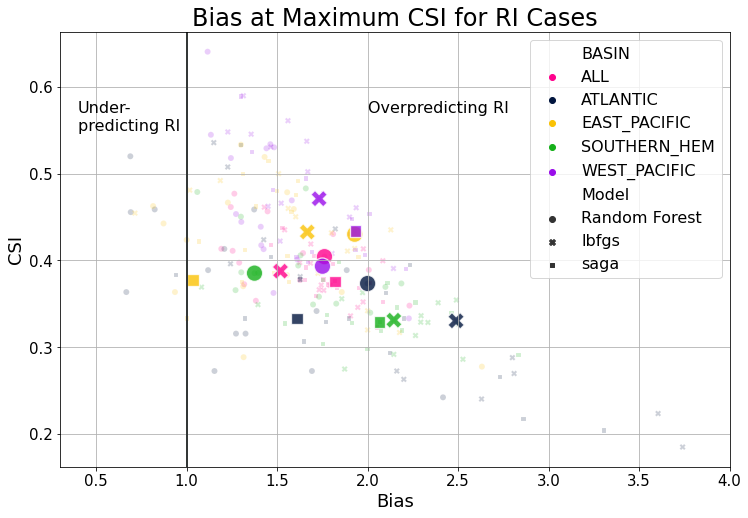

In [137]:
fig20,ax20 = plt.subplots(1,1,figsize=(12,8))
ax20.axvline(1,color='xkcd:charcoal',linewidth=2)
colors_list = ['hot pink','navy','goldenrod','green','violet']
pal_sel = sns.color_palette(sns.xkcd_palette(colors_list),5)
b_c_max = prec_vs_rec.sort_values(['CSI'], ascending=[False]).groupby(['BASIN','Model','Fold']).first()
medians = b_c_max.reset_index().groupby(['BASIN','Model'])['CSI'].median()
bc_rs = b_c_max.reset_index()
meds_plt = bc_rs[bc_rs['CSI'].isin(medians.reset_index()['CSI'])].groupby(['BASIN','Model']).mean()
# Plot
sns.scatterplot(data=b_c_max.reset_index(),x='Bias',y='CSI',hue='BASIN',style='Model',ax=ax20,
                alpha=0.2,legend=False,palette=pal_sel)
# Get mean bias for max CSI of each basin
sns.scatterplot(data=meds_plt.reset_index(),
            x='Bias',y='CSI',hue='BASIN',style='Model',s=270,ax=ax20,alpha=0.8,palette=pal_sel)
# Formatting
ax20.legend(fontsize=16)
ax20.tick_params(axis='y',labelsize=15)
ax20.tick_params(axis='x',labelsize=15)
ax20.set_ylabel('CSI',fontsize=18)
ax20.set_xlabel('Bias',fontsize=18)
ax20.grid()
ax20.set_xlim([0.3,4])
ax20.text(0.4,0.57,'Under-',fontsize=16)
ax20.text(0.4,0.55,'predicting RI',fontsize=16)
ax20.text(2,0.57,'Overpredicting RI',fontsize=16)
ax20.set_title('Bias at Maximum CSI for RI Cases',fontsize=24)
fig20.savefig('Figures/bias_vs_CSI_RI_cases_ALL.{fig_format}'.format(fig_format=fig_format),
              format=fig_format,dpi=350,bbox_inches='tight')

#### Calculate Area under Performance Diagram

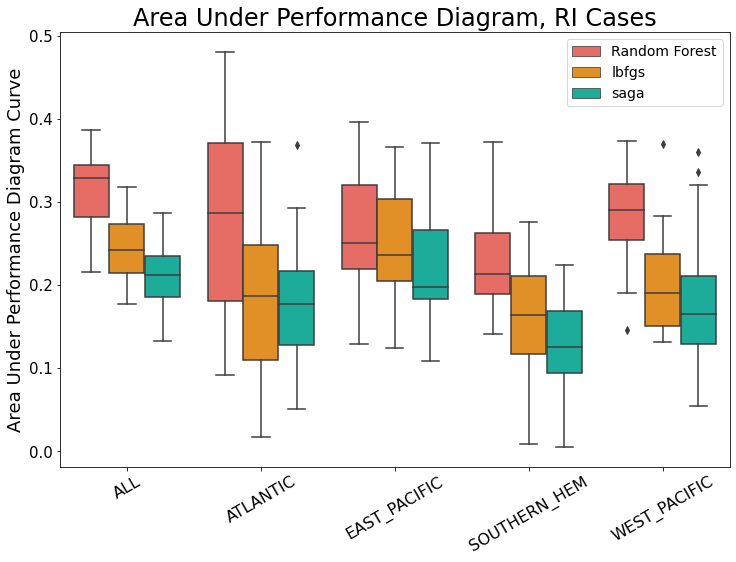

In [33]:
fig15,ax15 = plt.subplots(1,1,figsize=(12,8))
sns.boxplot(data=aupd_scores.reset_index(),x='BASIN',y='AUPD Score',hue='Model',ax=ax15)
ax15.set_xlabel(None)
ax15.set_xticklabels(aupd_scores.reset_index()['BASIN'].unique().tolist(),fontsize=16,rotation=30)
ax15.set_ylabel('Area Under Performance Diagram Curve',fontsize=18)
ax15.tick_params(axis='y',labelsize=15)
ax15.legend(fontsize=14)
ax15.set_title('Area Under Performance Diagram, RI Cases',fontsize=24)
fig15.savefig('Figures/AUPD_values_RI_cases.{fig_format}'.format(fig_format=fig_format),
              format=fig_format,dpi=350,bbox_inches='tight')

###### Reliability Diagram

In [34]:
y_vals['Predicted Basin'] = y_vals['Predicted Basin'].replace('SOUTH_PACIFIC','SOUTHERN_HEM',regex=True)

In [35]:
y_vals = y_vals.rename(columns={'Y actual':'Y true'})
y_vals_sel = y_vals.drop(columns={'BASIN','Unnamed: 0'})
y_vals_sel['Y pred probab (class: 1)'] = y_vals_sel['Y pred probab (class: 1)']*100
y_vals_sel['RI prob'] = (y_vals_sel['Y pred probab (class: 1)']).round(-1)
y_vals_sel['RI prob'] = y_vals_sel['RI prob'].mask(y_vals_sel['RI prob'] <= 5, 5)

In [36]:
pct_range = y_vals_sel['RI prob'].unique().tolist()
reliability = pd.DataFrame()
for ipct in pct_range:
    #ipct = 5
    y_sel = y_vals_sel.set_index(['RI prob']).xs(ipct)
    total = y_sel.groupby(['Predicted Basin','Model']).count()
    RI = y_sel[y_sel['Y true']==1].groupby(['Predicted Basin','Model']).count()
    i_df = pd.DataFrame(index=total.index,columns={'Observed Pct','Predicted Pct'})
    if len(RI) == 0:
        pct = 0
        i_df['Observed Pct'] = 0
        i_df['Observed No.'] = 0
    else:
        pct = 100*(RI/total)
        i_df['Observed Pct'] = pct['CASE']
        i_df['Observed No. RI'] = RI['CASE']
    i_df['Predicted Pct'] = ipct
    i_df['Observed No Total'] = total['CASE']
    #if ipct == 100
    reliability = reliability.append(i_df)

In [37]:
reliability = reliability.mask(reliability.isna(),0)
#reliability.xs('ALL')
#'Random Forest' not in total.index.get_level_values(1)
#y_vals_sel
reliability.reset_index().set_index(['Predicted Pct','Predicted Basin','Model']).xs(100)
#i_df

Observed Pct  Observed No. RI  Observed No Total
Predicted Basin Model                                                  
ALL             lbfgs     31.818182             14.0                 44
                saga      28.846154             15.0                 52
ATLANTIC        lbfgs      0.000000              0.0                  8
                saga       0.000000              0.0                  8
EAST_PACIFIC    lbfgs     33.333333              1.0                  3
                saga      25.000000              2.0                  8
SOUTHERN_HEM    lbfgs     61.538462              8.0                 13
                saga      66.666667              6.0                  9
WEST_PACIFIC    lbfgs     25.000000              5.0                 20
                saga      25.925926              7.0                 27

In [38]:
y_vals_sel.set_index(['RI prob','Predicted Basin','Model']).xs((100,'EAST_PACIFIC'))

/home/mmcgraw/miniconda3/envs/SHIPS/lib/python3.9/site-packages/IPython/core/interactiveshell.py:2947: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


CASE  NAME            DATE_full  Y true I_class label  Y pred  \
Model                                                                     
lbfgs  13864.0  BLAN  2015-06-02 18:00:00     1.0            RI     1.0   
lbfgs  13867.0  BLAN  2015-06-03 12:00:00     0.0         no RI     1.0   
lbfgs  13867.0  BLAN  2015-06-03 12:00:00     0.0         no RI     1.0   
saga   13867.0  BLAN  2015-06-03 12:00:00     0.0         no RI     1.0   
saga   13867.0  BLAN  2015-06-03 12:00:00     0.0         no RI     1.0   
saga   13867.0  BLAN  2015-06-03 12:00:00     0.0         no RI     1.0   
saga   13864.0  BLAN  2015-06-02 18:00:00     1.0            RI     1.0   
saga   13867.0  BLAN  2015-06-03 12:00:00     0.0         no RI     1.0   
saga   13864.0  BLAN  2015-06-02 18:00:00     1.0            RI     1.0   
saga   13867.0  BLAN  2015-06-03 12:00:00     0.0         no RI     1.0   
saga   13867.0  BLAN  2015-06-03 12:00:00     0.0         no RI     1.0   

       Y pred probab (class: 0)  Y pred probab (class: 1)  
Model                                                      
lbfgs                  0.044994                 95.500565  
lbfgs                  0.041892                 95.810827  
lbfgs                  0.045883                 95.411736  
saga                   0.049319                 95.068065  
saga                   0.046252                 95.374755  
saga                   0.040635                 95.936512  
saga                   0.048178                 95.182234  
saga                   0.039678                 96.032205  
saga                   0.044804                 95.519610  
saga                   0.044891                 95.510930  
saga                   0.047761                 95.223912

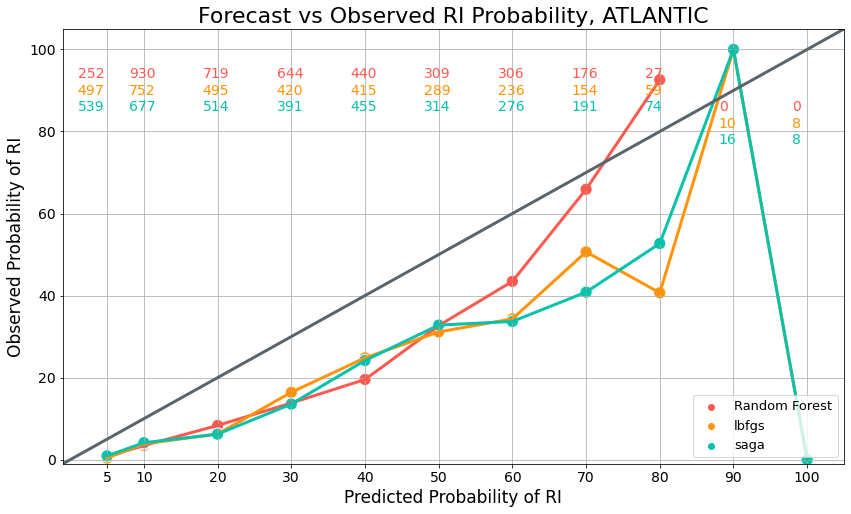

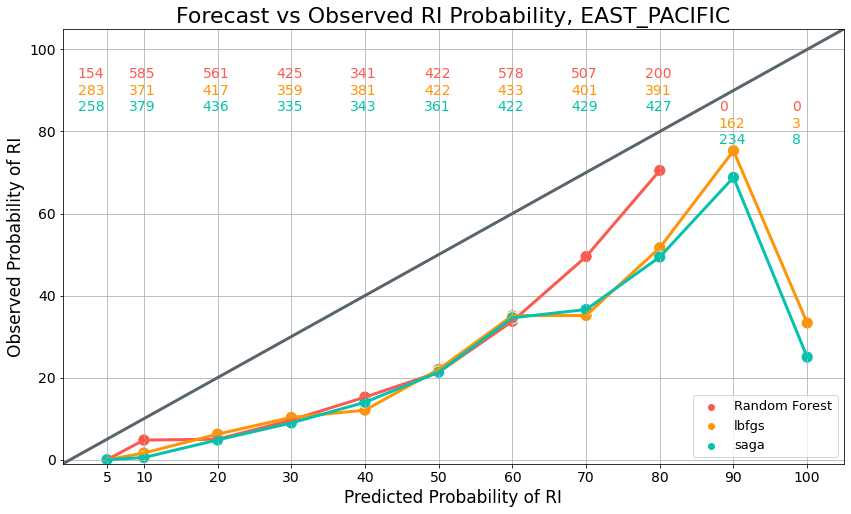

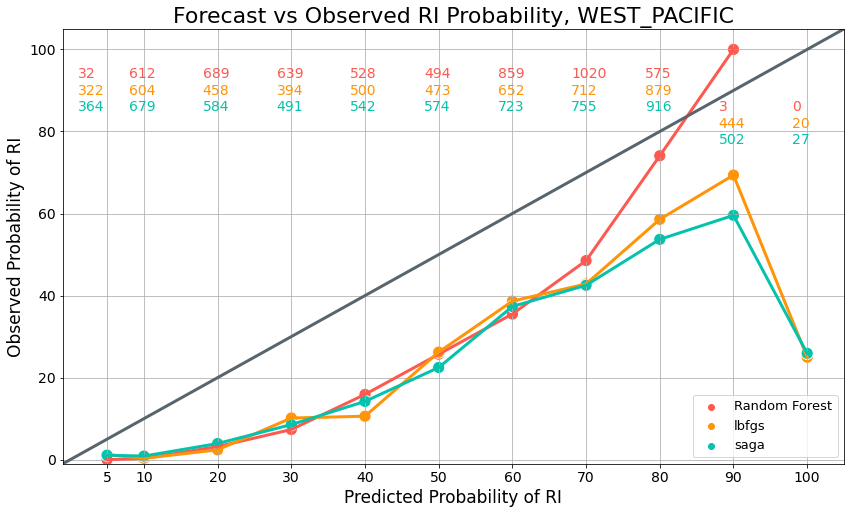

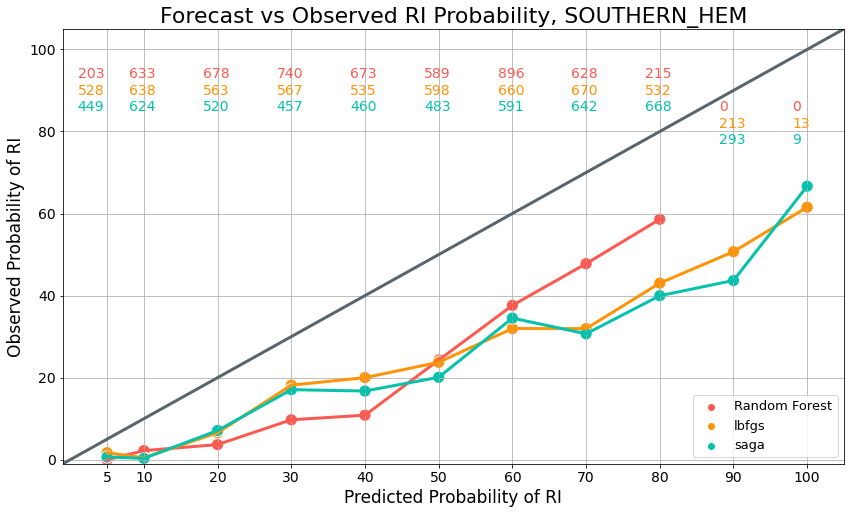

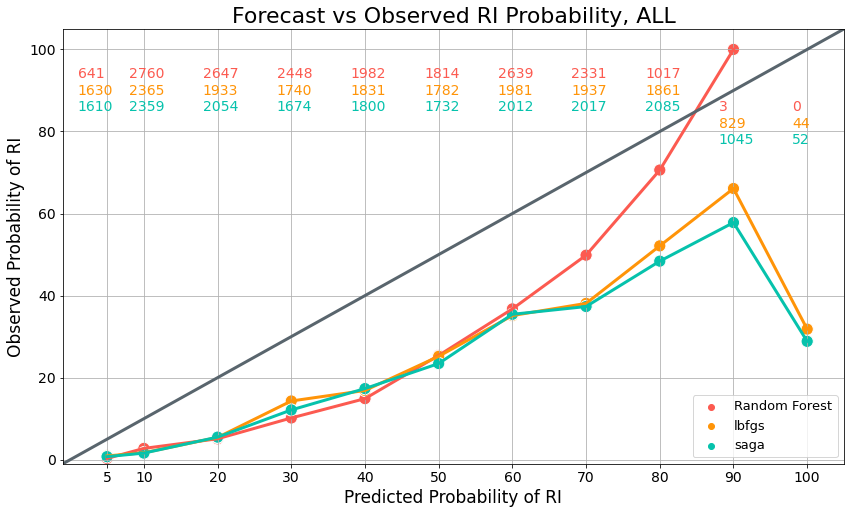

In [39]:
for basin_sel in basin_ALL:

    fig1,ax1 = plt.subplots(1,1,figsize=(14,8))
    sns.lineplot(data=reliability.xs(basin_sel).reset_index(),x='Predicted Pct',y='Observed Pct',hue='Model',
                 ax=ax1,linewidth=3,legend=False)
    sns.scatterplot(data=reliability.xs(basin_sel),x='Predicted Pct',y='Observed Pct',hue='Model',ax=ax1,s=150)
    ax1.set_ylim([-1,105])
    ax1.set_xlim([-1,105])
    ax1.tick_params(axis='y',labelsize=14)
    ax1.tick_params(axis='x',labelsize=14)
    ax1.plot([-5,105],[-5,105],linewidth=3,color='xkcd:slate grey')
    ax1.set_xticks(pct_range)
    ax1.grid()
    ax1.set_xlabel('Predicted Probability of RI',fontsize=17)
    ax1.legend(fontsize=13,loc='lower right')
    ax1.set_ylabel('Observed Probability of RI',fontsize=17)
    totals = reliability.xs(basin_sel).reset_index().sort_values('Predicted Pct').set_index(['Model','Predicted Pct'])
    models_list = reliability.reset_index()['Model'].unique().tolist()
    for i in models_list:
        mod_sel = totals.xs(i)
        for i_pct in pct_range:
            if i_pct in mod_sel.index:
                imod = mod_sel.xs(i_pct)['Observed No Total'].astype(int)
            else:
                imod = 0
            if i == 'Random Forest':
                yval = (89+4 if i_pct < 90 else 89 -4)
                i_color = sns.color_palette()[0]
            elif i == 'lbfgs':
                yval = (85+4 if i_pct < 90 else 85 -4)
                i_color = sns.color_palette()[1]
            elif i == 'saga':
                yval = (81+4 if i_pct < 90 else 81 -4)
                i_color = sns.color_palette()[2]
            #
            ax1.text((i_pct-4 if i_pct == 5 else i_pct -2),yval,imod,color=i_color,fontsize=14)
    # 
    ax1.set_title('Forecast vs Observed RI Probability, {basin_sel}'.format(basin_sel=basin_sel),
                 fontsize=22)
    fig1.savefig('Figures/Reliability_diagram_predicting_RI?_{basin_sel}.{fig_format}'.format(basin_sel=basin_sel,
                         fig_format=fig_format),format=fig_format,dpi=350,bbox_inches='tight')

In [40]:
foo = y_vals_sel.set_index(['RI prob','Predicted Basin','DATE_full','NAME']).xs(slice(90,100))
totals
#models_list = reliability.reset_index()['Model'].unique().tolist()#.sort()
#models_list

Observed Pct  Observed No. RI  Observed No Total
Model         Predicted Pct                                                  
saga          5.0                0.745342             12.0               1610
lbfgs         5.0                0.920245             15.0               1630
Random Forest 5.0                0.312012              2.0                641
              10.0               2.753623             76.0               2760
lbfgs         10.0               1.691332             40.0               2365
saga          10.0               1.610852             38.0               2359
lbfgs         20.0               5.431971            105.0               1933
Random Forest 20.0               5.100113            135.0               2647
saga          20.0               5.501461            113.0               2054
Random Forest 30.0              10.171569            249.0               2448
lbfgs         30.0              14.310345            249.0               1740
saga          30.0              12.126643            203.0               1674
Random Forest 40.0              14.883956            295.0               1982
lbfgs         40.0              16.876024            309.0               1831
saga          40.0              17.333333            312.0               1800
              50.0              23.441109            406.0               1732
Random Forest 50.0              25.413451            461.0               1814
lbfgs         50.0              25.196409            449.0               1782
Random Forest 60.0              36.756347            970.0               2639
saga          60.0              35.437376            713.0               2012
lbfgs         60.0              35.133771            696.0               1981
Random Forest 70.0              49.849850           1162.0               2331
lbfgs         70.0              38.100155            738.0               1937
saga          70.0              37.332672            753.0               2017
Random Forest 80.0              70.599803            718.0               1017
lbfgs         80.0              52.122515            970.0               1861
saga          80.0              48.393285           1009.0               2085
Random Forest 90.0             100.000000              3.0                  3
lbfgs         90.0              66.103739            548.0                829
saga          90.0              57.799043            604.0               1045
lbfgs         100.0             31.818182             14.0                 44
saga          100.0             28.846154             15.0                 52

In [41]:
foo

CASE  Y true  \
Predicted Basin DATE_full           NAME                            
WEST_PACIFIC    2018-10-23 06:00:00 WP31          21476.0     1.0   
                2018-10-23 00:00:00 WP31          21475.0     1.0   
                2018-10-23 12:00:00 WP31          21477.0     1.0   
ALL             WP31                21476.0  WEST_PACIFIC     1.0   
                                    21475.0  WEST_PACIFIC     1.0   
...                                                   ...     ...   
                2012-02-10 00:00:00 SH12           9785.0     1.0   
                2012-02-13 12:00:00 SH13           9838.0     0.0   
                2009-08-05 00:00:00 FELI          11990.0     1.0   
                2016-07-04 12:00:00 WP02          19654.0     1.0   
                2016-04-12 12:00:00 SH19          12279.0     1.0   

                                            I_class label  Y pred  \
Predicted Basin DATE_full           NAME                            
WEST_PACIFIC    2018-10-23 06:00:00 WP31               RI     1.0   
                2018-10-23 00:00:00 WP31               RI     1.0   
                2018-10-23 12:00:00 WP31               RI     1.0   
ALL             WP31                21476.0            RI     1.0   
                                    21475.0            RI     1.0   
...                                                   ...     ...   
                2012-02-10 00:00:00 SH12               RI     1.0   
                2012-02-13 12:00:00 SH13            no RI     1.0   
                2009-08-05 00:00:00 FELI               RI     1.0   
                2016-07-04 12:00:00 WP02               RI     1.0   
                2016-04-12 12:00:00 SH19               RI     1.0   

                                                     Model  \
Predicted Basin DATE_full           NAME                     
WEST_PACIFIC    2018-10-23 06:00:00 WP31     Random Forest   
                2018-10-23 00:00:00 WP31     Random Forest   
                2018-10-23 12:00:00 WP31     Random Forest   
ALL             WP31                21476.0  Random Forest   
                                    21475.0  Random Forest   
...                                                    ...   
                2012-02-10 00:00:00 SH12              saga   
                2012-02-13 12:00:00 SH13              saga   
                2009-08-05 00:00:00 FELI              saga   
                2016-07-04 12:00:00 WP02              saga   
                2016-04-12 12:00:00 SH19              saga   

                                             Y pred probab (class: 0)  \
Predicted Basin DATE_full           NAME                                
WEST_PACIFIC    2018-10-23 06:00:00 WP31                     0.139926   
                2018-10-23 00:00:00 WP31                     0.140426   
                2018-10-23 12:00:00 WP31                     0.146920   
ALL             WP31                21476.0                  0.139926   
                                    21475.0                  0.140426   
...                                                               ...   
                2012-02-10 00:00:00 SH12                     0.138044   
                2012-02-13 12:00:00 SH13                     0.144024   
                2009-08-05 00:00:00 FELI                     0.142814   
                2016-07-04 12:00:00 WP02                     0.133766   
                2016-04-12 12:00:00 SH19                     0.081402   

                                             Y pred probab (class: 1)  
Predicted Basin DATE_full           NAME                               
WEST_PACIFIC    2018-10-23 06:00:00 WP31                    86.007362  
                2018-10-23 00:00:00 WP31                    85.957371  
                2018-10-23 12:00:00 WP31                    85.307956  
ALL             WP31                21476.0                 86.007362  
                                    21475.0                 85.95737

In [42]:
from SHIPS_preprocess import load_processed_SHIPS
SHIPS_predictors,BASIN = load_processed_SHIPS(2005,2019,'SIMPLE_MASK',24,'INTERP','ALL')

In [43]:
loo = SHIPS_predictors.set_index(['BASIN','DATE_full','NAME'])#.loc[foo.index]

In [44]:
loo2 = loo.loc[loo.index.intersection(foo.index)]

In [45]:
loo2

CASE  TIME     DTL  TYPE  SHRG  \
BASIN        DATE_full           NAME                                      
ATLANTIC     2005-10-18 06:00:00 WILM   7780.0 -12.0   292.0   1.0   NaN   
                                 WILM   7780.0  -6.0   316.0   1.0   NaN   
                                 WILM   7780.0   0.0   326.0   1.0  11.8   
                                 WILM   7780.0   6.0   276.0   1.0  17.4   
                                 WILM   7780.0  12.0   306.0   1.0  15.4   
...                                        ...   ...     ...   ...   ...   
WEST_PACIFIC 2018-10-24 00:00:00 WP31  21479.0   0.0  1915.0   1.0  14.1   
                                 WP31  21479.0   6.0  1945.0   1.0  17.3   
                                 WP31  21479.0  12.0  1984.0   1.0  19.2   
                                 WP31  21479.0  18.0  2026.0   1.0  18.1   
                                 WP31  21479.0  24.0  2037.0   1.0  19.2   

                                           D200      Z850   VMAX   VMPI  DELV  \
BASIN        DATE_full           NAME                                           
ATLANTIC     2005-10-18 06:00:00 WILM       NaN       NaN   45.0    NaN  15.0   
                                 WILM       NaN       NaN   55.0    NaN   5.0   
                                 WILM  0.000008  0.000008   60.0  152.0   0.0   
                                 WILM  0.000010  0.000008   65.0  155.0   5.0   
                                 WILM  0.000010  0.000008   75.0  149.0  15.0   
...                                         ...       ...    ...    ...   ...   
WEST_PACIFIC 2018-10-24 00:00:00 WP31  0.000013  0.000015  130.0  144.0   0.0   
                                 WP31  0.000013  0.000016  145.0  139.0  15.0   
                                 WP31  0.000009  0.000014  150.0  138.0  20.0   
                                 WP31  0.000010  0.000013  150.0  137.0  20.0   
                                 WP31  0.000011  0.000015  150.0  138.0  20.0   

                                       ...  DELV -12   POT  GOES Tb  \
BASIN        DATE_full           NAME  ...                            
ATLANTIC     2005-10-18 06:00:00 WILM  ...      15.0   NaN   -624.0   
                                 WILM  ...      15.0   NaN   -624.0   
                                 WILM  ...      15.0  92.0   -624.0   
                                 WILM  ...      15.0  95.0   -624.0   
                                 WILM  ...      15.0  89.0   -624.0   
...                                    ...       ...   ...      ...   
WEST_PACIFIC 2018-10-24 00:00:00 WP31  ...      40.0  14.0   -723.0   
                                 WP31  ...      40.0   9.0   -723.0   
                                 WP31  ...      40.0   8.0   -723.0   
                                 WP31  ...      40.0   7.0   -723.0   
                                 WP31  ...      40.0   8.0   -723.0   

                                       s(GOES Tb)  pct < -50C  storm size  \
BASIN        DATE_full           NAME                                       
ATLANTIC     2005-10-18 06:00:00 WILM       130.0        62.0       107.0   
                                 WILM       130.0        62.0       107.0   
                                 WILM       130.0        62.0       107.0   
                                 WILM       130.0        62.0       107.0   
                                 WILM       130.0        62.0       107.0   
...                                           ...         ...         ...   
WEST_PACIFIC 2018-10-24 00:00:00 WP31        45.0       100.0       160.0   
                                 WP31        45.0       100.0       160.0   
                                 WP31        45.0       100.0       160.0   
                                 WP31        45.0       100.0       160.0   
                                 WP31        45.0       100.0       160.0   

                                        PC1    PC2   PC3    PC4  
BASIN  

(-0.5, 24.5)

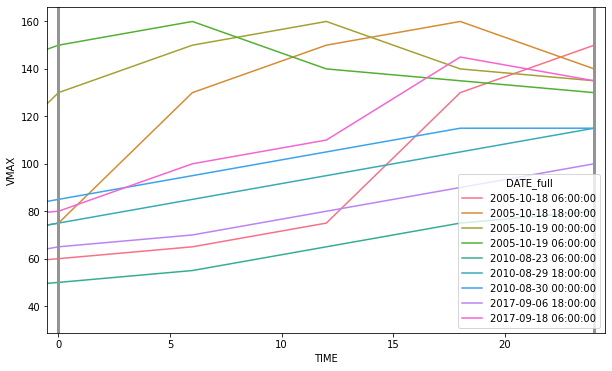

In [46]:
fig40,ax40 = plt.subplots(1,1,figsize=(10,6))
sns.lineplot(data=loo2.xs('ATLANTIC').reset_index(),x='TIME',y='VMAX',hue='DATE_full',ax=ax40)
#foo.xs('ATLANTIC')
ax40.axvline(0,color='xkcd:gray',linewidth=3)
ax40.axvline(24,color='xkcd:gray',linewidth=3)
ax40.set_xlim([-0.5,24.5])

In [47]:
l24 = loo2.xs('WEST_PACIFIC').reset_index().set_index(['DATE_full','NAME','TIME']).xs(24,level=2)
l0 = loo2.xs('WEST_PACIFIC').reset_index().set_index(['DATE_full','NAME','TIME']).xs(0,level=2)
#loo2.xs(('SOUTH_PACIFIC','2005-02-25 12:00:00'))

In [48]:
high_prob_no_RI = foo[foo['Y true']==0]
high_prob_RI = foo[foo['Y true']==1]
loo_high_prob_no_RI = loo.loc[high_prob_no_RI.index.intersection(loo.index)]
loo_high_prob_RI = loo.loc[high_prob_RI.index.intersection(loo.index)]
loo2 = loo.copy()
loo2 = loo2.loc[loo2.index.isin(foo.index)]
loo2 = loo2[loo2['DTL'] >= 100]
loo2 = loo2[loo2['TIME'].isin([0,6,12,18,24])]
loo2 = loo2.reset_index().set_index(['BASIN','CASE','NAME','DATE_full','TIME']).mean(level=(0,1,2,3)).reset_index().set_index(['BASIN','DATE_full','NAME'])
loo2['is RI'] = 'RI'
loo2['is RI'].loc[high_prob_no_RI.index.intersection(loo.index)] = 'not RI'
#loo2['is RI'] = loo2['is RI'].map({0:'not RI',1:'RI'})

/home/mmcgraw/miniconda3/envs/SHIPS/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [49]:
loo2

CASE     DTL  TYPE   SHRG      D200  \
BASIN        DATE_full           NAME                                           
ATLANTIC     2005-10-18 06:00:00 WILM   7780.0   299.2   1.0  12.44  0.000010   
             2005-10-18 18:00:00 WILM   7782.0   274.0   1.0  11.22  0.000011   
             2005-10-19 00:00:00 WILM   7783.0   265.4   1.0  11.96  0.000010   
             2005-10-19 06:00:00 WILM   7784.0   266.6   1.0  12.98  0.000009   
             2010-08-23 06:00:00 DANI   9056.0  1719.6   1.0  11.48  0.000004   
...                                        ...     ...   ...    ...       ...   
WEST_PACIFIC 2018-10-23 00:00:00 WP31  21475.0  1874.8   1.0  13.30  0.000010   
             2018-10-23 06:00:00 WP31  21476.0  1889.0   1.0  13.84  0.000011   
             2018-10-23 12:00:00 WP31  21477.0  1914.0   1.0  15.04  0.000010   
             2018-10-23 18:00:00 WP31  21478.0  1951.2   1.0  16.12  0.000011   
             2018-10-24 00:00:00 WP31  21479.0  1981.4   1.0  17.58  0.000011   

                                           Z850   VMAX   VMPI  DELV  RHMD  \
BASIN        DATE_full           NAME                                       
ATLANTIC     2005-10-18 06:00:00 WILM  0.000007   96.0  151.4  36.0  72.4   
             2005-10-18 18:00:00 WILM  0.000007  131.0  150.8  56.0  71.4   
             2005-10-19 00:00:00 WILM  0.000007  143.0  151.6  13.0  70.8   
             2005-10-19 06:00:00 WILM  0.000006  143.0  153.0  -7.0  68.8   
             2010-08-23 06:00:00 DANI  0.000007   65.0  134.4  15.0  66.2   
...                                         ...    ...    ...   ...   ...   
WEST_PACIFIC 2018-10-23 00:00:00 WP31  0.000013   94.0  148.6  29.0  72.4   
             2018-10-23 06:00:00 WP31  0.000014  110.0  145.8  35.0  70.2   
             2018-10-23 12:00:00 WP31  0.000015  125.0  143.4  35.0  67.8   
             2018-10-23 18:00:00 WP31  0.000014  137.0  140.8  27.0  65.4   
             2018-10-24 00:00:00 WP31  0.000015  145.0  139.2  15.0  63.2   

                                       ...   POT  GOES Tb  s(GOES Tb)  \
BASIN        DATE_full           NAME  ...                              
ATLANTIC     2005-10-18 06:00:00 WILM  ...  91.4   -624.0       130.0   
             2005-10-18 18:00:00 WILM  ...  75.8   -652.0        77.0   
             2005-10-19 00:00:00 WILM  ...  21.6   -709.0        60.0   
             2005-10-19 06:00:00 WILM  ...   3.0   -764.0        34.0   
             2010-08-23 06:00:00 DANI  ...  84.4   -709.0       104.0   
...                                    ...   ...      ...         ...   
WEST_PACIFIC 2018-10-23 00:00:00 WP31  ...  83.6   -738.0       104.0   
             2018-10-23 06:00:00 WP31  ...  70.8   -693.0        61.0   
             2018-10-23 12:00:00 WP31  ...  53.4   -747.0        87.0   
             2018-10-23 18:00:00 WP31  ...  30.8   -779.0        54.0   
             2018-10-24 00:00:00 WP31  ...   9.2   -723.0        45.0   

                                       pct < -50C  storm size    PC1    PC2  \
BASIN        DATE_full           NAME                                         
ATLANTIC     2005-10-18 06:00:00 WILM        62.0       107.0   15.0 -123.0   
             2005-10-18 18:00:00 WILM        83.0       136.0 -115.0 -151.0   
             2005-10-19 00:00:00 WILM        83.0       140.0   15.0 -176.0   
             2005-10-19 06:00:00 WILM        99.0       158.0   15.0 -205.0   
             2010-08-23 06:00:00 DANI        80.0       112.0    0.0 -145.0   
...                                           ...         ...    ...    ...   
WEST_PACIFIC 2018-10-23 00:00:00 WP31        90.0       136.0    0.0 -198.0   
             2018-10-23 06:00:00 WP31        96.0       141.0    0.0 -190.0   
             2018-10-23 12:00:00 WP31        96.0       155.0    0.0 -224.0   
             2018-10-23 18:00:00 WP31       100.0       170.0    0.0 -239.0   
             2018-10-24 00:00:00 WP31       100.0       160.0    0.0 -206.0   

        

<AxesSubplot:xlabel='TIME', ylabel='VMAX'>

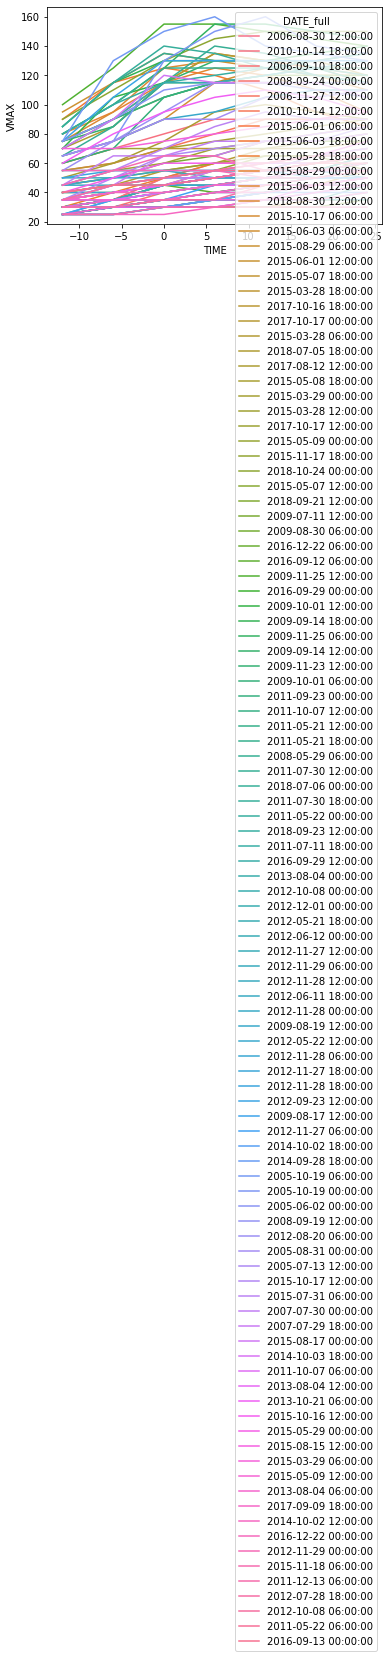

In [50]:
sns.lineplot(data=loo_high_prob_no_RI.reset_index(),x='TIME',y='VMAX',hue='DATE_full')
#palette =
#loo2['is RI']

In [51]:
features_sel = ['POT','DELV -12','GOES Tb','SHRG','PC2','D200','NSST','NOHC','DTL','VMAX']
feat_units = ['kt','kt','K','kt','','s^{-1}','C','J/kg-C','km','kt']
#.columns

<AxesSubplot:xlabel='BASIN', ylabel='DTL'>

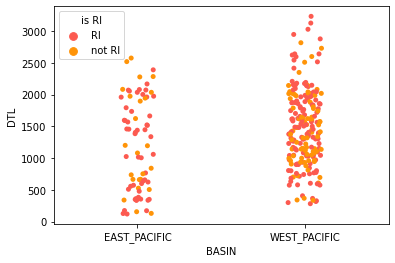

In [52]:
test = loo2.drop(index=('ATLANTIC'),level=0).reset_index().sort_values('BASIN')
sns.stripplot(data=test,x='BASIN',y='DTL',hue='is RI')
#test#.groupby(['BASIN','is RI'])['DTL'].mean()

/tmp/ipykernel_1731260/2082795741.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fig50,ax50 = plt.subplots(np.int(no_features/2),2,figsize=(15,20))


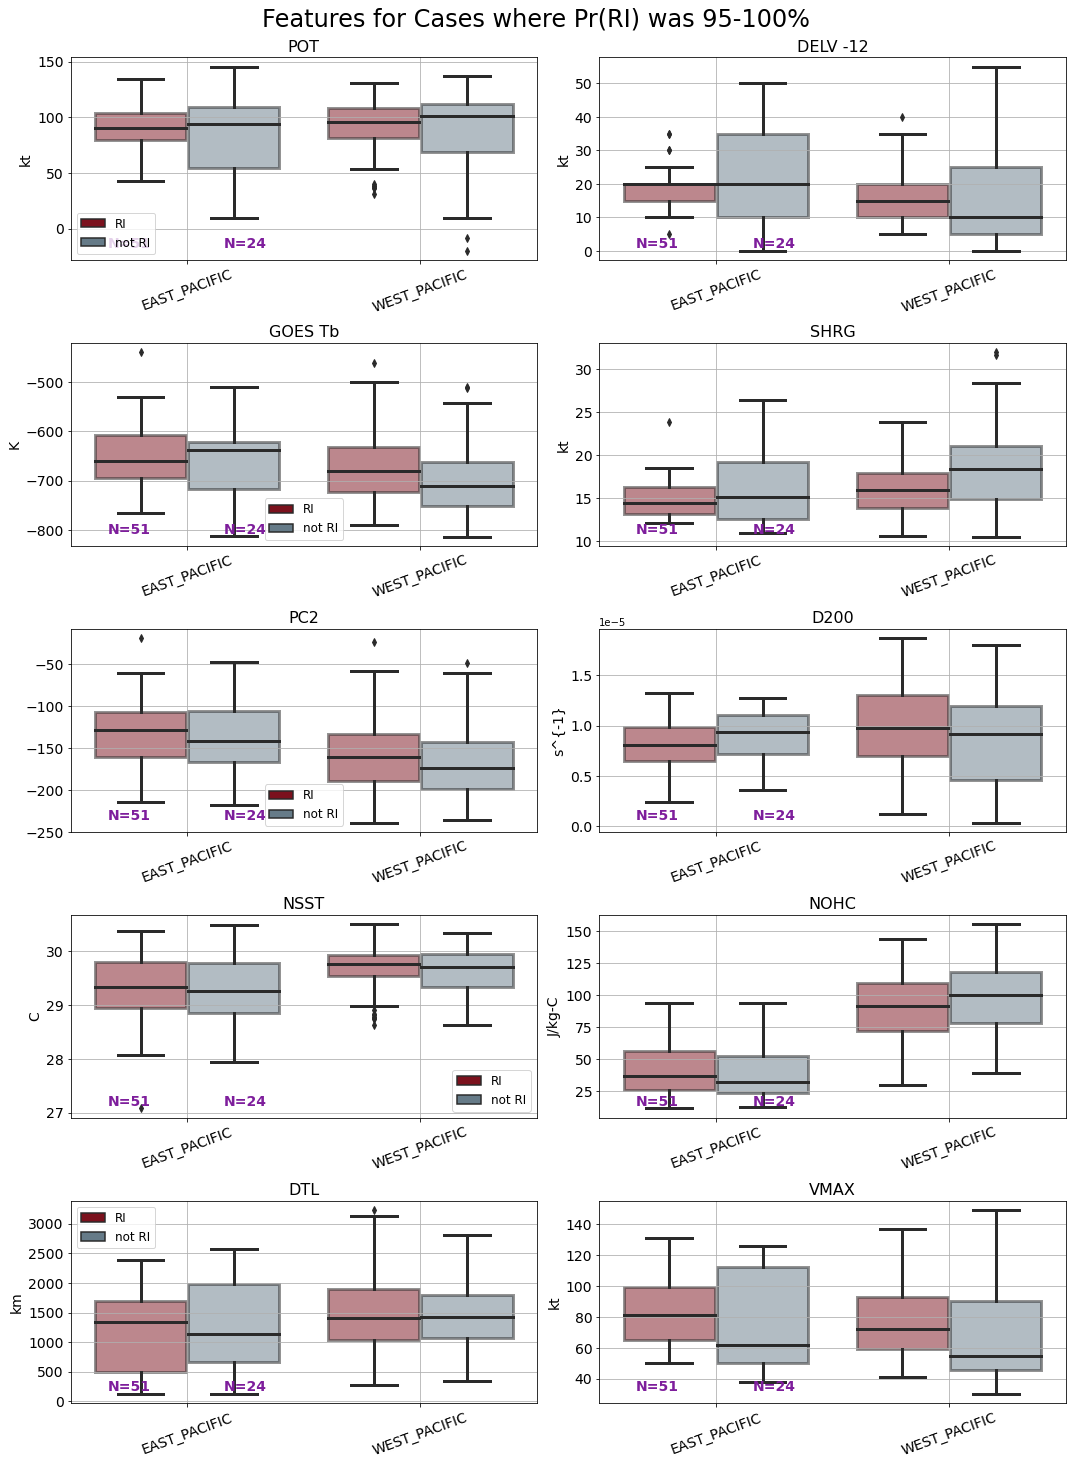

In [53]:
no_features = len(features_sel)
#loo2 = loo2
fig50,ax50 = plt.subplots(np.int(no_features/2),2,figsize=(15,20))
for i_feat in np.arange(0,no_features):
    #i_feat = 0
    ax_sel = ax50.flatten()[i_feat]
    use_data = loo2.drop(index=('ATLANTIC'),level=0).reset_index().sort_values('BASIN')
    use_x = ['EAST_PACIFIC','SOUTH_PACIFIC','WEST_PACIFIC']
    use_hue = ['RI','not RI']
    use_y = features_sel[i_feat]
    iplt = sns.boxplot(data=use_data,x='BASIN',y=use_y,hue='is RI',
                       palette=sns.set_palette( {'xkcd:blue gray','xkcd:crimson'}),linewidth=3,ax=ax_sel,
                      boxprops=dict(alpha=0.5))
    #ax_sel.set_xticklabels(['not RI','RI'],fontsize=14)
    ax_sel.set_xlabel(None)
    ax_sel.tick_params(axis='y',labelsize=14)
    ax_sel.tick_params(axis='x',labelsize=14,rotation=20)
    ax_sel.set_title(features_sel[i_feat],fontsize=16)
    ax_sel.set_ylabel(feat_units[i_feat],fontsize=14)
    ax_sel.legend(fontsize=12,loc='best')
    # ax_sel.set_ylim([0.5*min(abs(use_data[use_y])),1.5*max(abs(use_data[use_y]))])
    if np.mod(i_feat,2) != 0:
        iplt.legend_.remove()
    #elif i_feat == 0:
    ax_sel.grid()
    ## Add # of samples
    n_levels = len(use_data.reset_index()['is RI'].unique())
    each_width = 1 / n_levels
    offsets = np.linspace(0, 1 - each_width,n_levels)
    offsets -= offsets.mean()
    pos = [x+o for x in np.arange(len(use_x)) for o in offsets]
    counts = use_data.groupby(['BASIN','is RI'])[use_y].size()
    counts = counts.reindex(pd.MultiIndex.from_product([use_x,['RI','not RI']]))
    medians = use_data.groupby(['BASIN','is RI'])[use_y].median()
    medians = medians.reindex(pd.MultiIndex.from_product([use_x,['RI','not RI']]))
    max_med = use_data.groupby(['BASIN','is RI'])[use_y].min()
    for p,n,m in zip(pos,counts,medians):
        if not np.isnan(m):
            ax_sel.annotate('N={:.0f}'.format(n), xy=(p, min(max_med)), xycoords='data', ha='center', va='bottom',
                            color='xkcd:purple',
                           weight='semibold',fontsize=14)
##
fig50.tight_layout()
fig50.suptitle('Features for Cases where Pr(RI) was 95-100%',fontsize=24,y=1.015)
fig50.savefig('Figures/Features_PrRI_100_cases.{fig_format}'.format(fig_format=fig_format),
              format=fig_format,dpi=350,bbox_inches='tight')

In [54]:
counts

EAST_PACIFIC   RI         51.0
               not RI     24.0
SOUTH_PACIFIC  RI          NaN
               not RI      NaN
WEST_PACIFIC   RI        139.0
               not RI     82.0
Name: VMAX, dtype: float64

<AxesSubplot:xlabel='POT', ylabel='Density'>

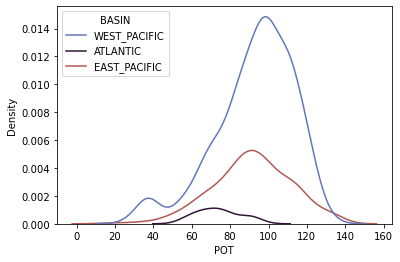

In [55]:
sns.kdeplot(data=loo_high_prob_RI.reset_index(),x='POT',hue='BASIN',palette='twilight')

/local/home/mmcgraw/SHIPS/SHIPS_clean/SHIPS_plotting.py:214: UserWarning: The following kwargs were not used by contour: 'axes'
  plt.contourf(success_ratio_matrix, pod_matrix, csi_matrix,
/local/home/mmcgraw/SHIPS/SHIPS_clean/SHIPS_plotting.py:229: UserWarning: The following kwargs were not used by contour: 'axes'
  bias_contour_object = plt.contour(


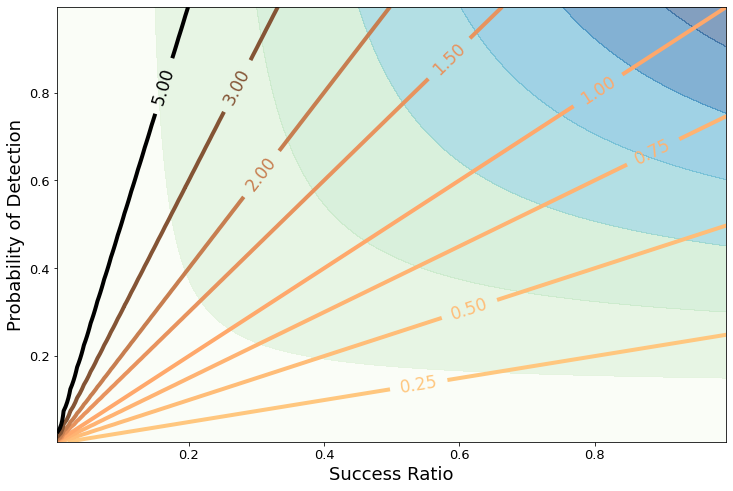

In [56]:
fig20,ax20 = plt.subplots(1,1,figsize=(12,8))
make_performance_diagram_background(ax23)
ax20.set_xlabel('Success Ratio',fontsize=18)
ax20.set_ylabel('Probability of Detection',fontsize=18)
ax20.tick_params(axis='y',labelsize=13)
ax20.tick_params(axis='x',labelsize=13)
fig20.savefig('Figures/empty_performance_diagram.{fig_format}'.format(fig_format=fig_format),
              format=fig_format,dpi=350,bbox_inches='tight')